# CDC Diabetes Health Indicators

## Problem Statement
Diabetes is a growing health concern worldwide, with significant implications for public health systems. In Kenya, the prevalence of diabetes is increasing, particularly in urban areas. There is a need to understand the relationship between lifestyle factors and diabetes to develop effective interventions. This project aims to analyze the CDC Diabetes Health Indicators Dataset to identify key risk factors for diabetes and provide actionable insights to improve diabetes care and prevention in Kenya.

## Business Understanding
The primary objective of this project is to better understand the relationship between lifestyle and diabetes in the US using the CDC Diabetes Health Indicators Dataset. This topic is of particular interest due to the rising prevalence of diabetes in Kenya, especially in urban areas. By studying this data, we aim to create awareness about diabetes and develop interventions to reduce the prevalence of risk factors for kidney failure and improve diabetes care in Kenya. This project applies to the Health and Medicine domain and targets the Ministry of Health, teaching institutions, Non-Governmental Organizations, the private sector, and teaching hospitals in Kenya. If successful, this analysis could significantly impact by raising awareness and guiding interventions to improve diabetes care and reduce related health risks.

## Data Understanding
We will collect data on diabetes diagnosis, demographics (race, sex), personal information (income, education), and health history (drinking, smoking, mental health, physical health). The raw data is sourced from [Kaggle's Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset) and is available for download and public use. The features include integer and binary variables, and the dataset does not contain missing values. We will handle data preprocessing tasks such as encoding categorical variables and scaling numerical features while addressing data privacy and managing any inconsistent data.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_012_health_indicators_BRFSS2015.csv.xls to diabetes_012_health_indicators_BRFSS2015.csv.xls


In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Load the dataset
data =pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv.xls")

# Display the first few rows and summary of the dataset
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

### Variables Table

This dataset is from the UCI Machine Learning Repository and contains health indicators related to diabetes, collected through a questionnaire given to participants. Below is a detailed description of the data:

| Variable Name          | Role    | Type     | Description                                                                                                             | Units      | Missing Values |
|------------------------|---------|----------|------------------------------------------------------------------------------------------------------------------------|------------|----------------|
| **ID**                 | ID      | Integer  | Patient ID                                                                                                             | -          | no             |
| **Diabetes_binary**    | Target  | Binary   | 0 = no diabetes, 1 = prediabetes or diabetes                                                                           | -          | no             |
| **HighBP**             | Feature | Binary   | 0 = no high BP, 1 = high BP                                                                                            | -          | no             |
| **HighChol**           | Feature | Binary   | 0 = no high cholesterol, 1 = high cholesterol                                                                          | -          | no             |
| **CholCheck**          | Feature | Binary   | 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years                                              | -          | no             |
| **BMI**                | Feature | Integer  | Body Mass Index                                                                                                        | -          | no             |
| **Smoker**             | Feature | Binary   | Have you smoked at least 100 cigarettes in your entire life? (5 packs = 100 cigarettes) 0 = no, 1 = yes                | -          | no             |
| **Stroke**             | Feature | Binary   | (Ever told) you had a stroke. 0 = no, 1 = yes                                                                          | -          | no             |
| **HeartDiseaseorAttack** | Feature | Binary | Coronary heart disease (CHD) or myocardial infarction (MI). 0 = no, 1 = yes                                            | -          | no             |
| **PhysActivity**       | Feature | Binary   | Physical activity in past 30 days - not including job. 0 = no, 1 = yes                                                 | -          | no             |
| **Fruits**             | Feature | Binary   | Consume fruit 1 or more times per day. 0 = no, 1 = yes                                                                 | -          | no             |
| **Veggies**            | Feature | Binary   | Consume vegetables 1 or more times per day. 0 = no, 1 = yes                                                            | -          | no             |
| **HvyAlcoholConsump**  | Feature | Binary   | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week). 0 = no, 1 = yes | -    | no             |
| **AnyHealthcare**      | Feature | Binary   | Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no, 1 = yes     | -          | no             |
| **NoDocbcCost**        | Feature | Binary   | Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no, 1 = yes  | -          | no             |
| **GenHlth**            | Feature | Integer  | Would you say that in general your health is: scale 1-5 (1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor)   | -          | no             |
| **MentHlth**           | Feature | Integer  | Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days | -          | no             |
| **PhysHlth**           | Feature | Integer  | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days | -          | no             |
| **DiffWalk**           | Feature | Binary   | Do you have serious difficulty walking or climbing stairs? 0 = no, 1 = yes                                             | -          | no             |
| **Sex**                | Feature | Binary   | Sex. 0 = female, 1 = male                                                                                              | -          | no             |
| **Age**                | Feature | Integer  | Age (13-level age category, see codebook). 1 = 18-24, 9 = 60-64, 13 = 80 or older                                      | -          | no             |
| **Education**          | Feature | Integer  | Education level (EDUCA, see codebook). Scale 1-6 (1 = Never attended school or only kindergarten, 2 = Grades 1 through 8, 3 = Grades 9 through 11, 4 = Grade 12 or GED, 5 = College 1-3 years, 6 = College 4+ years) | -          | no             |
| **Income**             | Feature | Integer  | Income scale (INCOME2, see codebook). Scale 1-8 (1 = less than $10,000, 5 = less than $35,000, 8 = $75,000 or more)    | -          | no             |

---

### Key Variables
1. **BMI (Body Mass Index)**:
   - **Importance**: A well-known risk factor for diabetes, higher BMI indicates overweight or obesity, which is strongly associated with diabetes.

2. **HighBP (High Blood Pressure)**:
   - **Importance**: High blood pressure is often found in individuals with diabetes and can be a significant predictor.

3. **HighChol (High Cholesterol)**:
   - **Importance**: High cholesterol levels are another risk factor for diabetes and related cardiovascular diseases.

4. **PhysActivity (Physical Activity)**:
   - **Importance**: Regular physical activity is known to reduce the risk of diabetes. Lack of physical activity can be a significant risk factor.

5. **Smoker**:
   - **Importance**: Smoking is associated with various health issues, including increased risk of diabetes.

6. **GenHlth (General Health)**:
   - **Importance**: General health status can provide insights into overall health and well-being, which can be correlated with diabetes risk.

7. **MentHlth (Mental Health)**:
   - **Importance**: Mental health issues can indirectly affect diabetes risk through lifestyle choices and stress-related factors.

8. **PhysHlth (Physical Health)**:
   - **Importance**: Similar to general health, physical health status can indicate the presence of other conditions that may influence diabetes risk.

9. **Age**:
   - **Importance**: Age is a non-modifiable risk factor for diabetes, with prevalence increasing with age.

10. **Sex**:
    - **Importance**: Understanding differences in diabetes prevalence and risk between males and females can be crucial for targeted interventions.

11. **Education**:
    - **Importance**: Education level can influence health literacy and lifestyle choices, impacting diabetes risk.

12. **Income**:
    - **Importance**: Income level can affect access to healthcare, healthy food options, and overall lifestyle, impacting diabetes risk.


## Data Cleaning

In [ ]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
duplicate_rows

23899

In [ ]:
#Examining duplicate rows

# Display duplicate rows
duplicate_rows = data[data.duplicated()]
duplicate_rows

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,2.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,2.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


In [ ]:
# Count duplicate rows
num_duplicates = duplicate_rows.sum()
num_duplicates

Diabetes_012               500.0
HighBP                    4407.0
HighChol                  6083.0
CholCheck                23727.0
BMI                     608616.0
Smoker                    5423.0
Stroke                       8.0
HeartDiseaseorAttack       176.0
PhysActivity             23409.0
Fruits                   20050.0
Veggies                  23208.0
HvyAlcoholConsump          306.0
AnyHealthcare            23873.0
NoDocbcCost                 28.0
GenHlth                  39395.0
MentHlth                  2445.0
PhysHlth                  1864.0
DiffWalk                    49.0
Sex                      10779.0
Age                     179445.0
Education               136754.0
Income                  182249.0
dtype: float64

Based on the information above, what seems like duplicates are just similar entries on the lifestyles of the patients who filled the assigned questionnnaire. Dropping would implicate deleting data that is crucial to the pool.

The data contains duplicate entries which, we have chosen not to remove since doing so could skew the dataset's distribution or fail to account for variations that are necessary for model robustness.

In [ ]:
pd.set_option('display.max_columns', None)
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
#Change the name of 'diabetes_012' column to "Diabetes_binary" since it indicates whether a person has diabetes (1) or not (0).
data = data.rename(columns={'Diabetes_012': 'Diabetes_binary'})
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


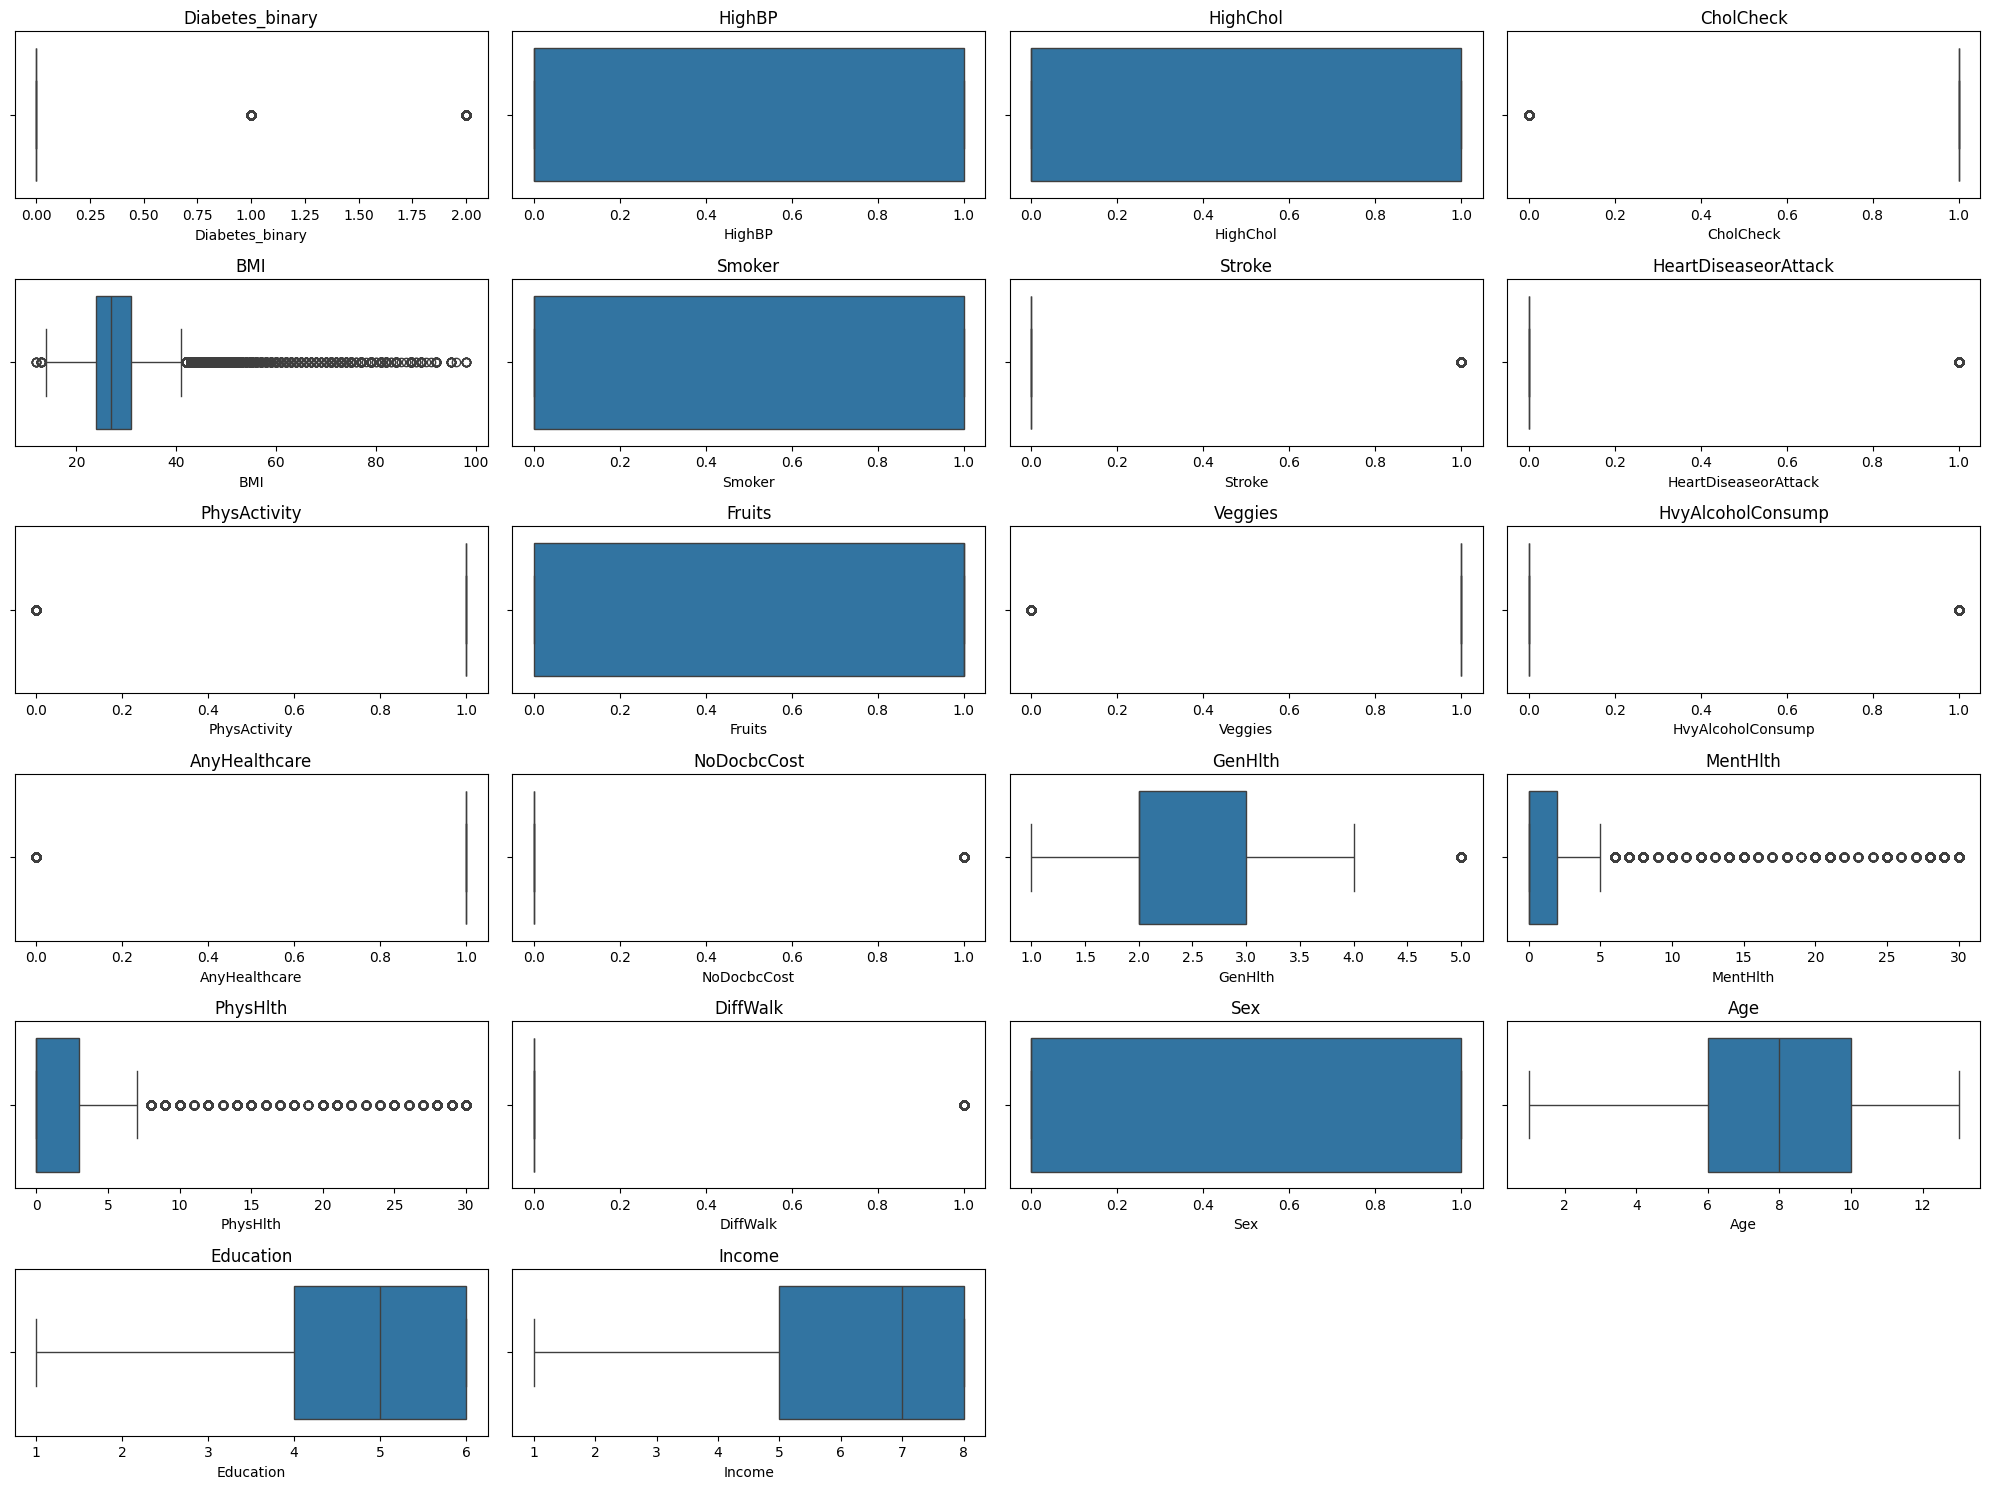

In [ ]:
#Identifying Outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns):
    plt.subplot(6, 4, i+1)
    sns.boxplot(x=data[column])
    plt.title(column)


plt.tight_layout()
plt.show()


In [ ]:
## HANDLING OUTLIERS

# Function to handle outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Handle outliers for the identified variables
outlier_columns = ['BMI']
for col in outlier_columns:
    data = handle_outliers(data, col)

data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000
mean,0.280102,0.420140,0.422027,0.962187,27.569492,0.443398,0.040122,0.093039,0.764585,0.637896,0.813680,0.057236,0.951774,0.081580,2.480964,3.070413,4.063667,0.156931,0.445001,8.062932,5.060558,6.090767
std,0.681138,0.493582,0.493884,0.190744,4.964920,0.496787,0.196245,0.290488,0.424259,0.480610,0.389366,0.232293,0.214243,0.273725,1.059246,7.272803,8.541691,0.363737,0.496967,3.064311,0.983537,2.054222
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


We noted outliers in the following columns; GenHlth, BMI, PhysHlth and MentHlth. We will asess how these outliers impact your predictive model. We will run your models with and without the outliers to see if there is a significant difference in performance

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,243833.0,0.280102,0.681138,0.0,0.0,0.0,0.0,2.0
HighBP,243833.0,0.420140,0.493582,0.0,0.0,0.0,1.0,1.0
HighChol,243833.0,0.422027,0.493884,0.0,0.0,0.0,1.0,1.0
CholCheck,243833.0,0.962187,0.190744,0.0,1.0,1.0,1.0,1.0
BMI,243833.0,27.569492,4.964920,14.0,24.0,27.0,31.0,41.0
Smoker,243833.0,0.443398,0.496787,0.0,0.0,0.0,1.0,1.0
Stroke,243833.0,0.040122,0.196245,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,243833.0,0.093039,0.290488,0.0,0.0,0.0,0.0,1.0
PhysActivity,243833.0,0.764585,0.424259,0.0,1.0,1.0,1.0,1.0
Fruits,243833.0,0.637896,0.480610,0.0,0.0,1.0,1.0,1.0


In [ ]:
# Chacking if the target is imbalanced
diabetes_distribution = data['Diabetes_binary'].value_counts()

diabetes_distribution

Diabetes_binary
0.0    207514
2.0     31979
1.0      4340
Name: count, dtype: int64

This distribution indicates that the dataset is imbalanced, with a significantly larger proportion of non-diabetic individuals compared to prediabetic and diabetic ones.

No Diabetes (0): 146,456 occurrences (85.11%)

Pre-diabetic (1) and Diabetic (2): 19,463 occurrences (14.89%)

The categories Pre-diabetic (1) and Diabetic (2) together make up a smaller portion of the dataset compared to those with no diabetes. This imbalance needs to be taken into consideration when developing predictive models, as it can affect model performance.

# Exploratory Data Analysis

## Univariate Analysis

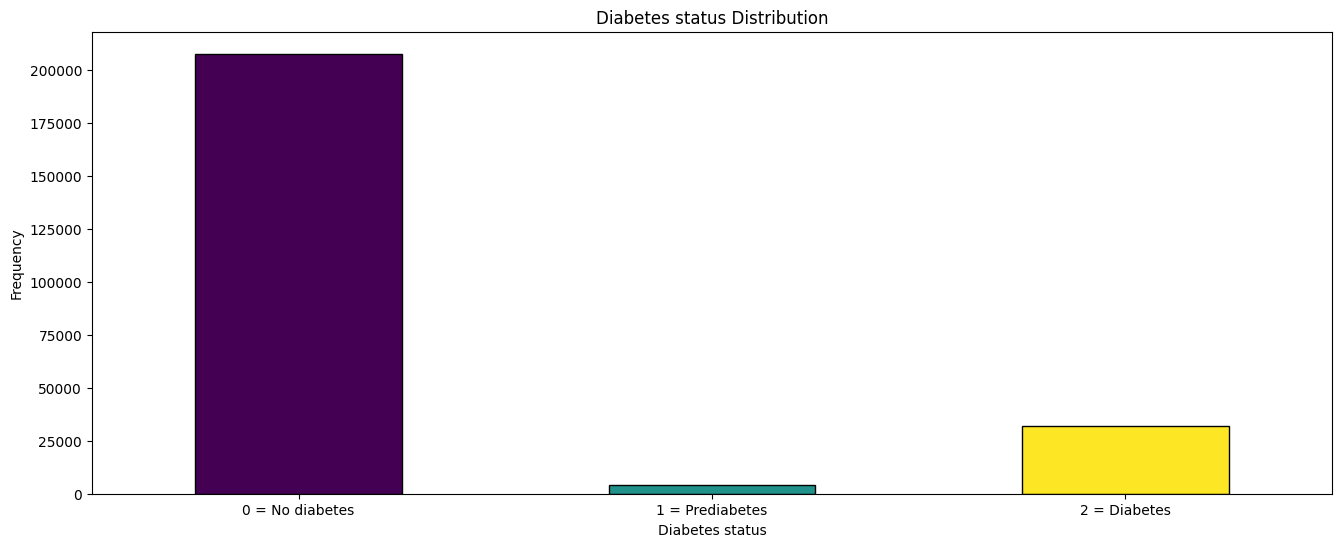

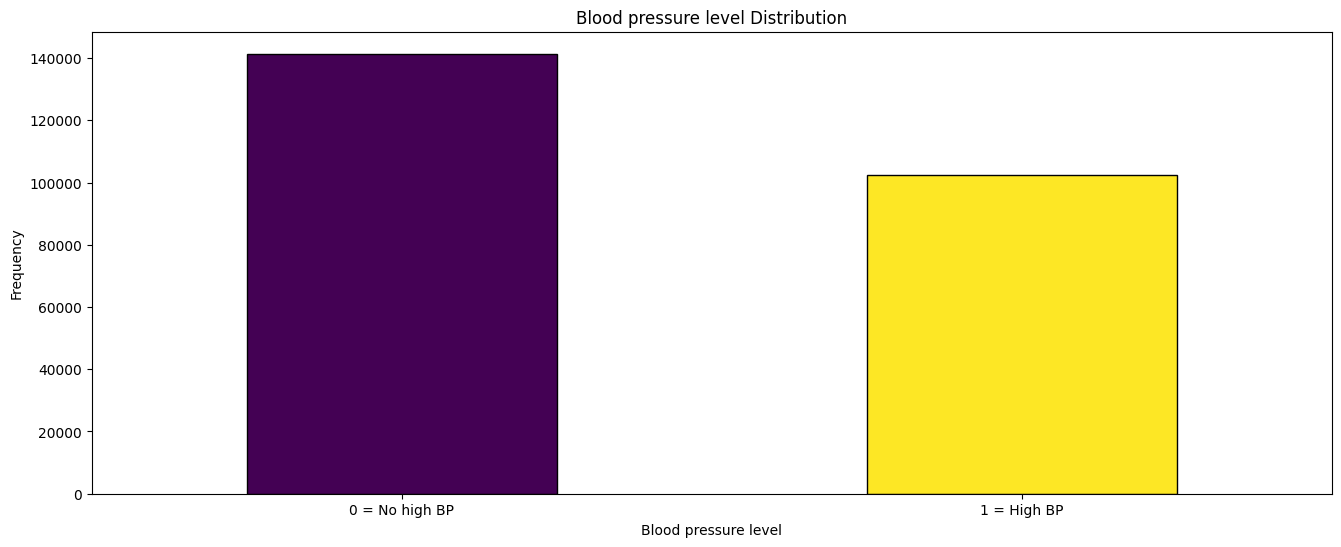

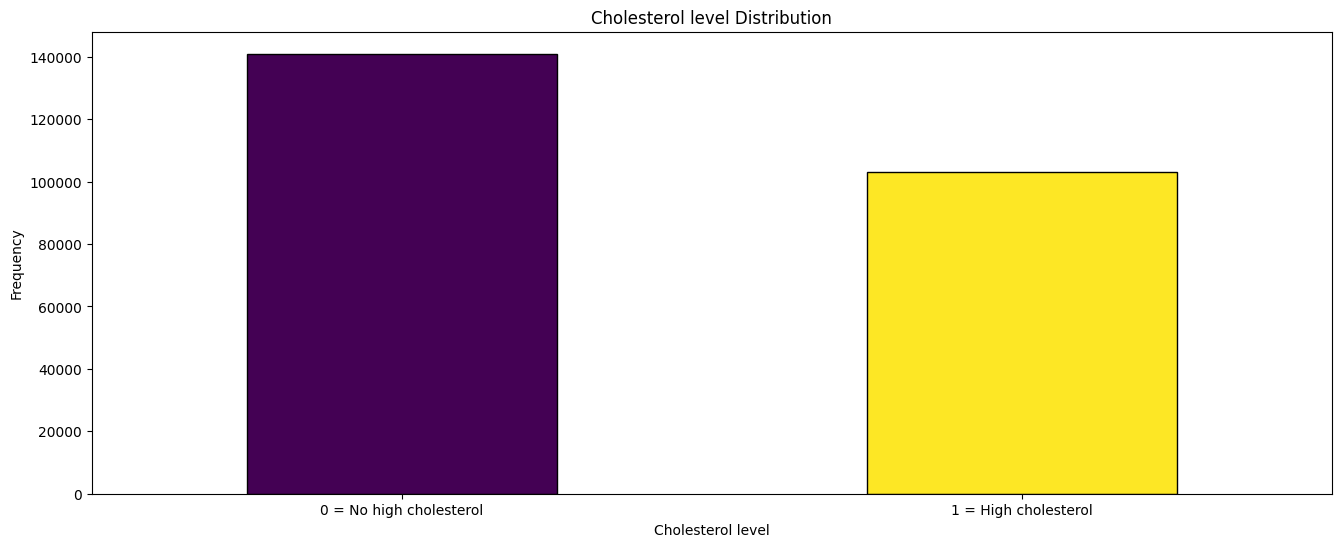

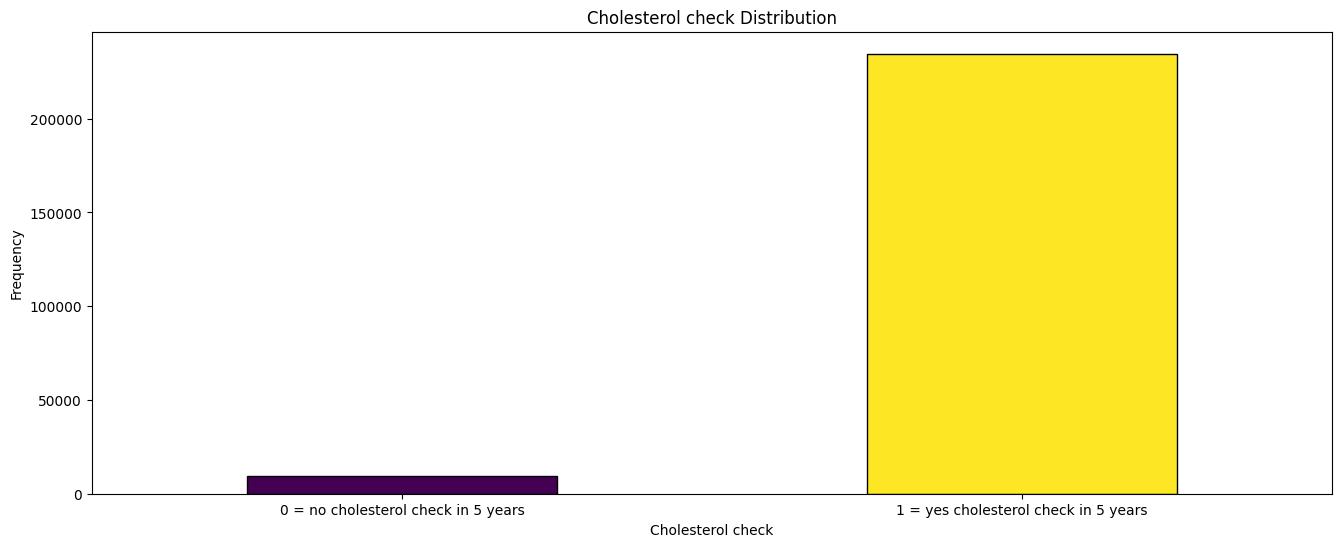

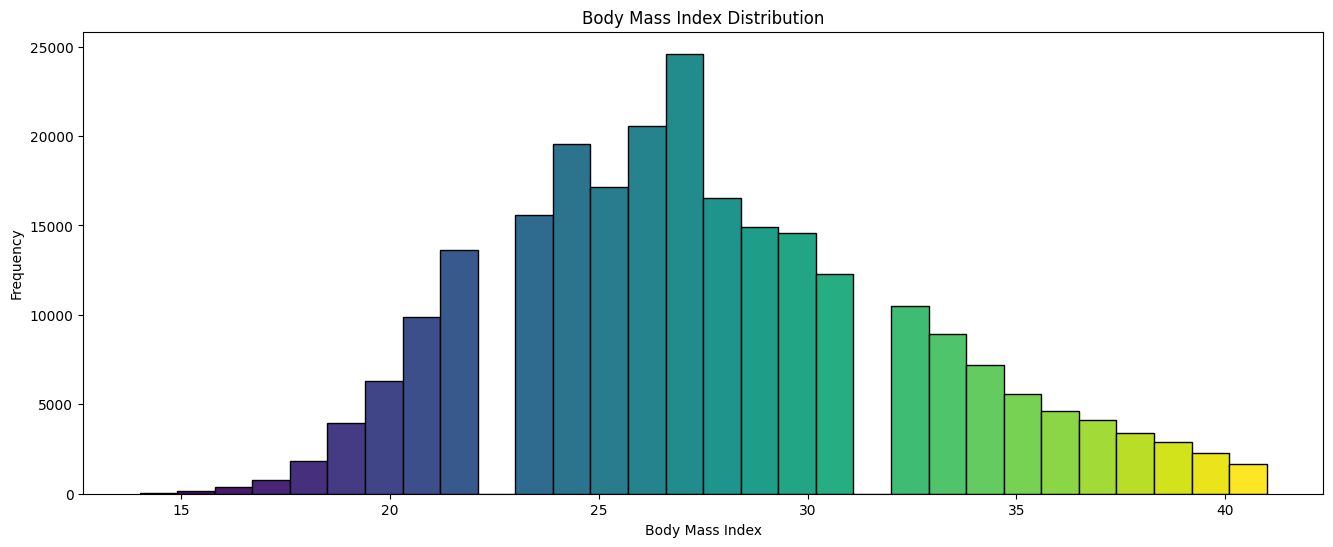

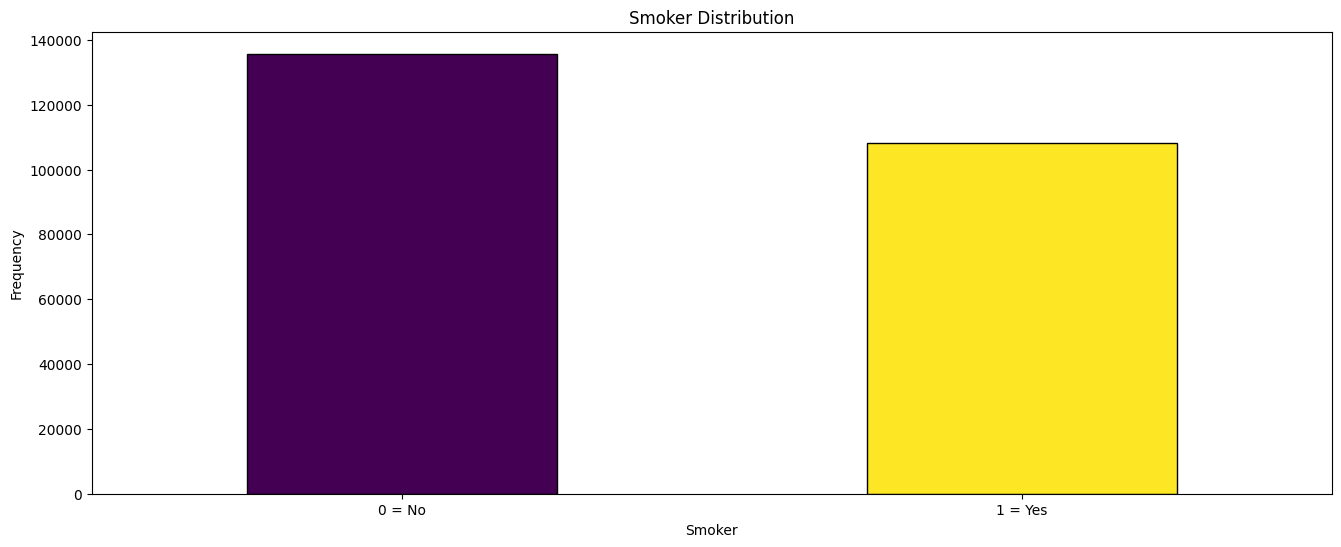

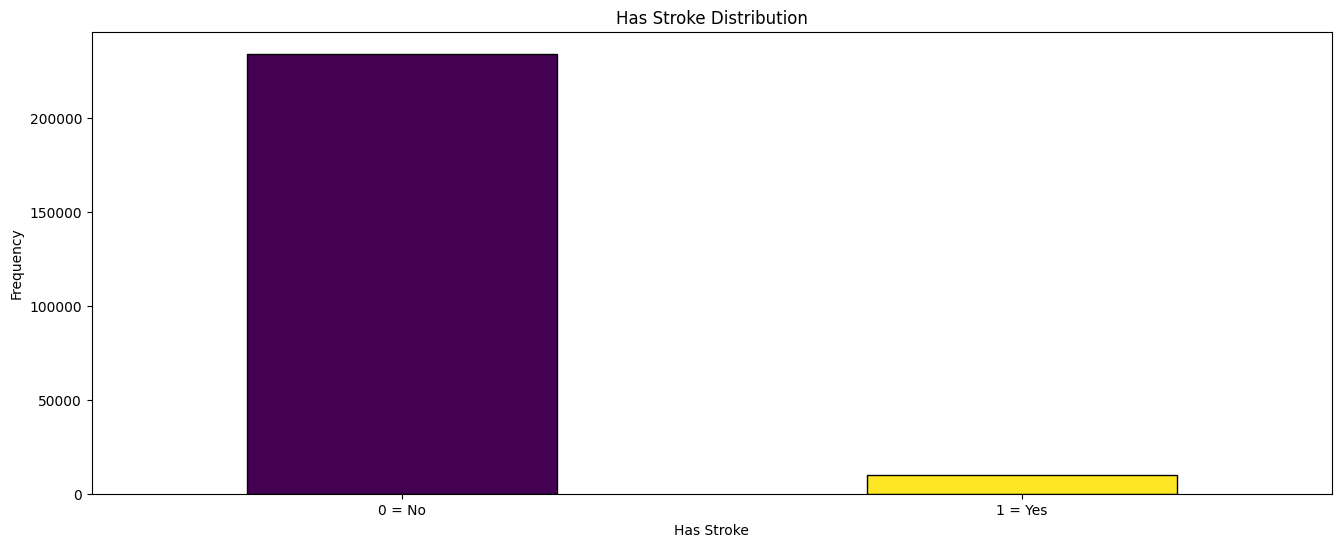

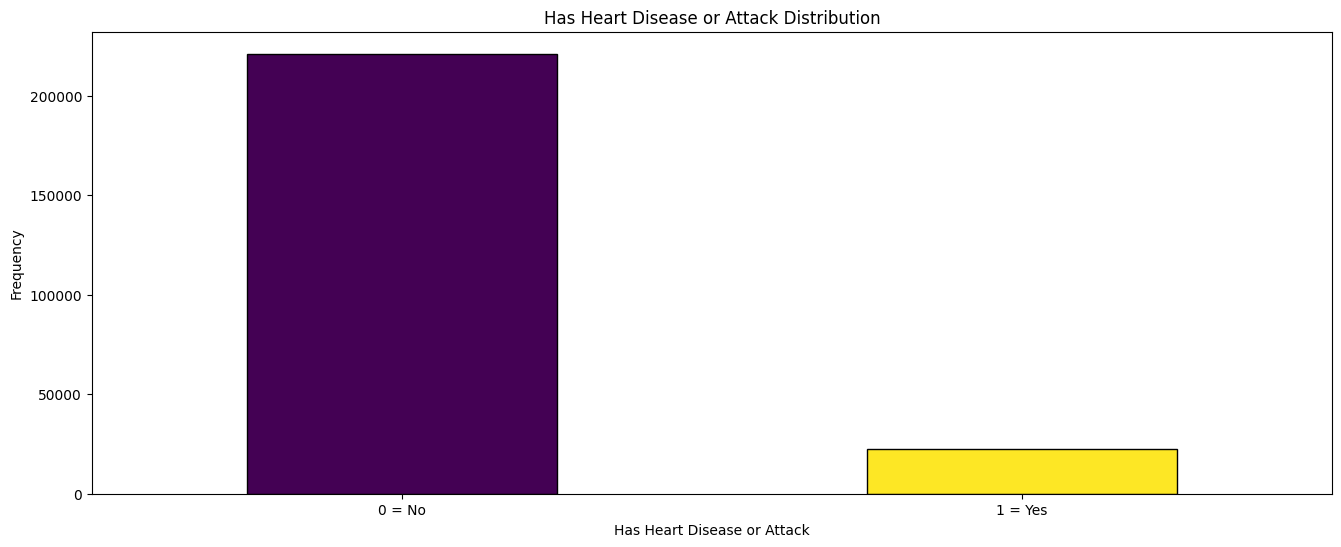

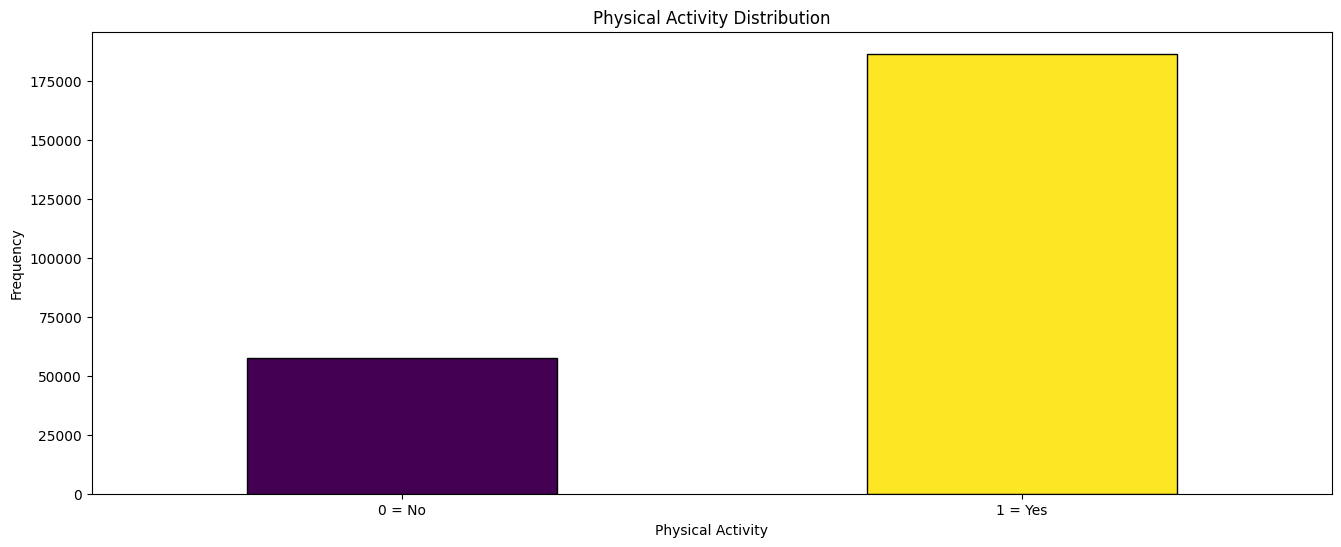

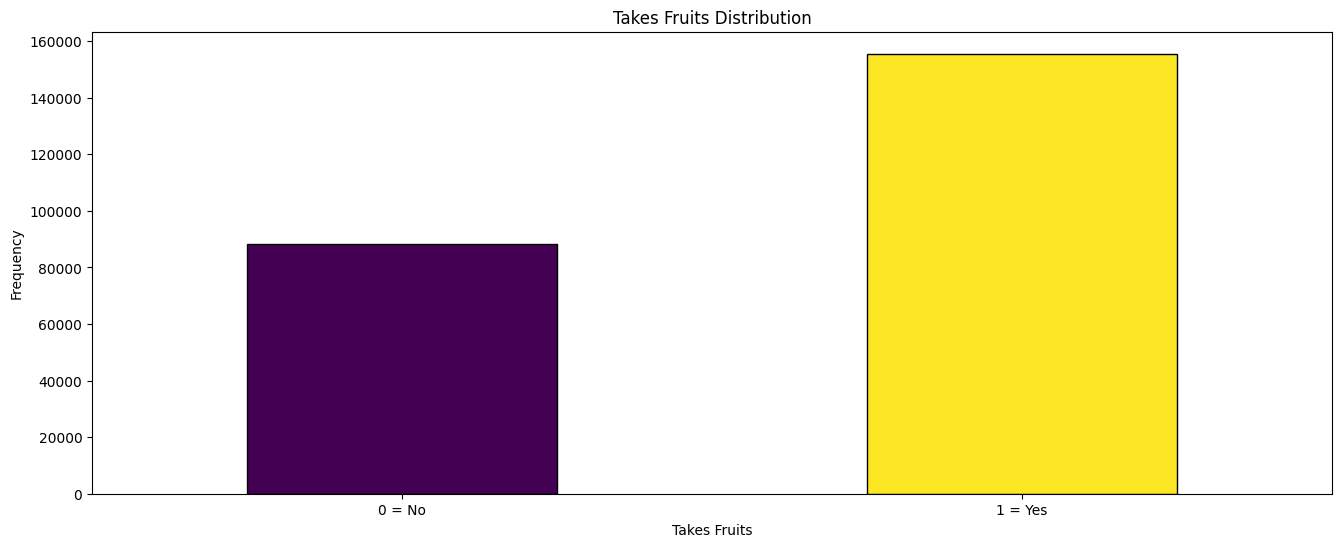

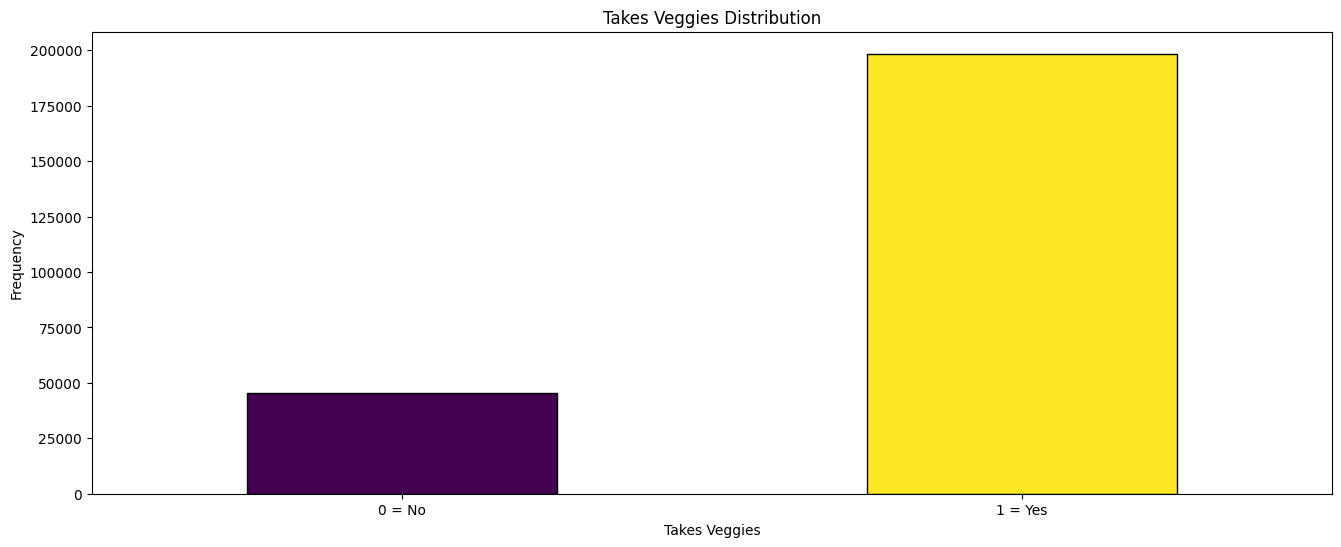

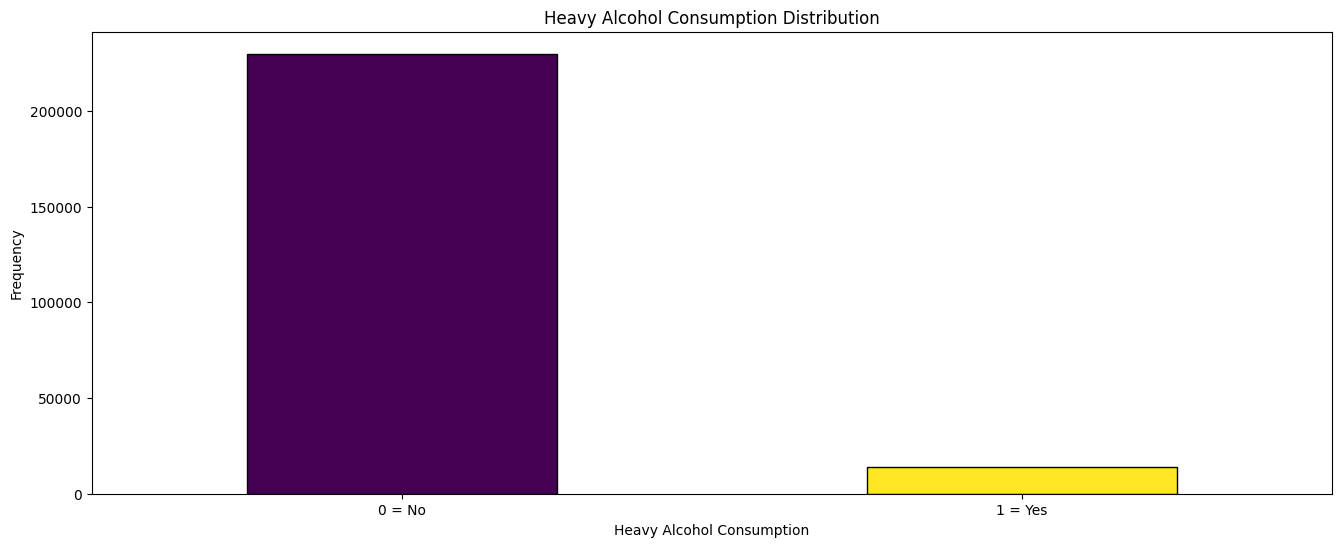

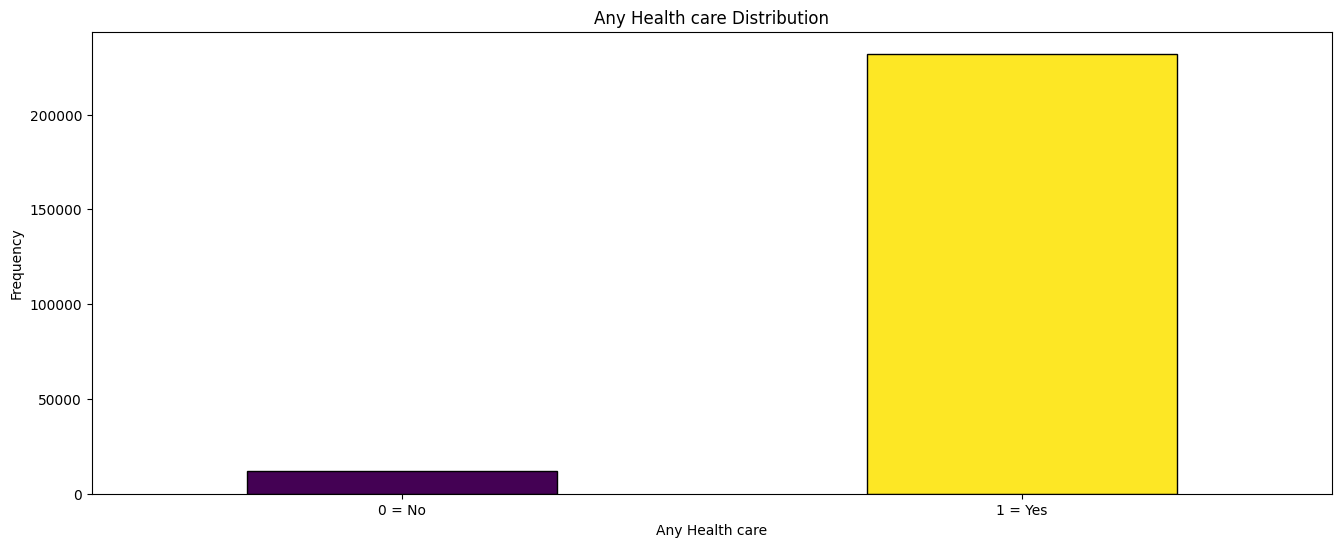

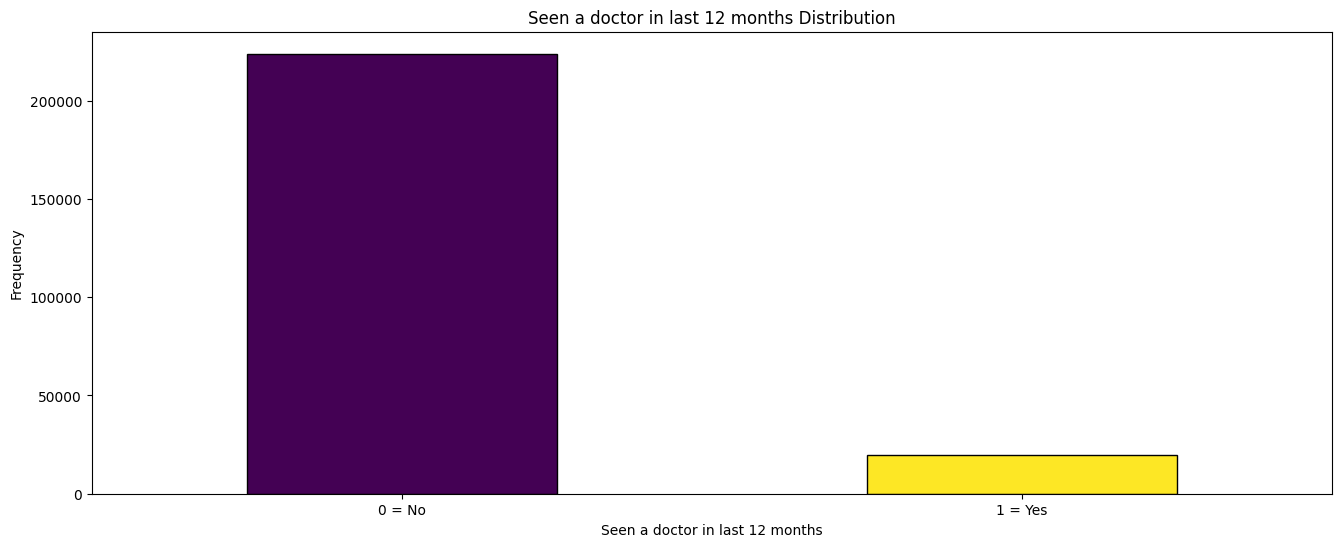

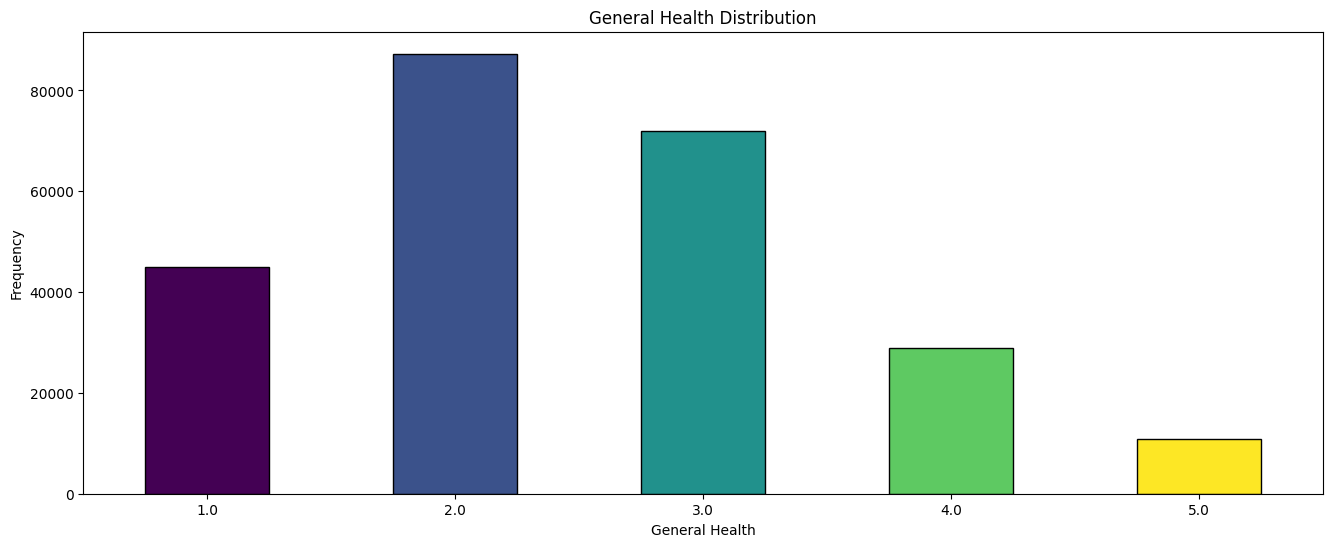

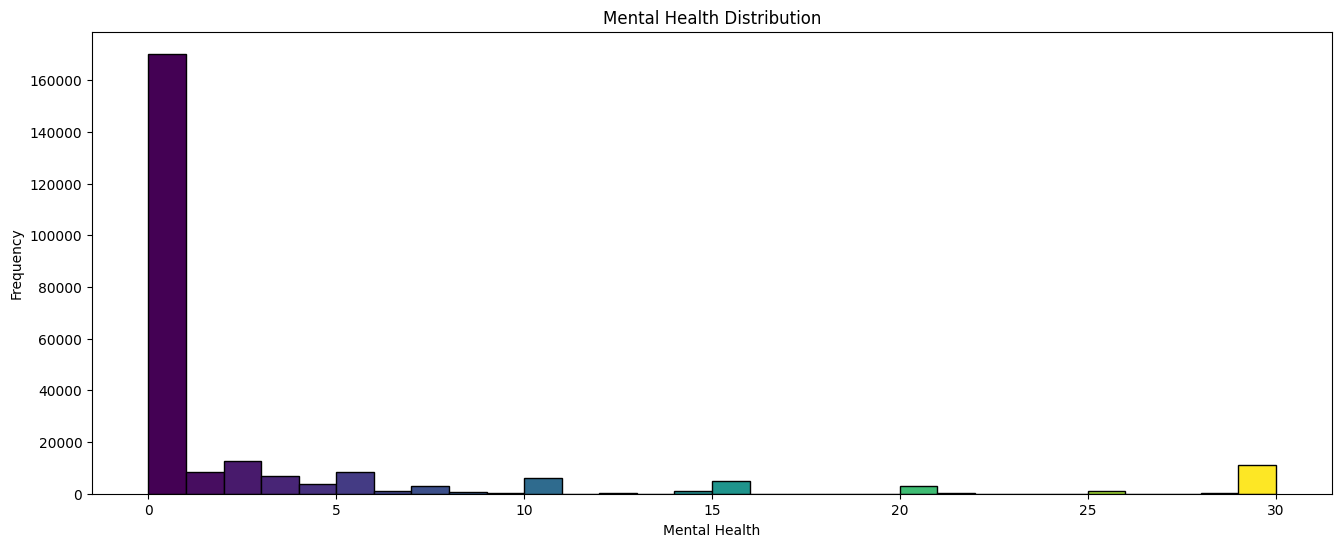

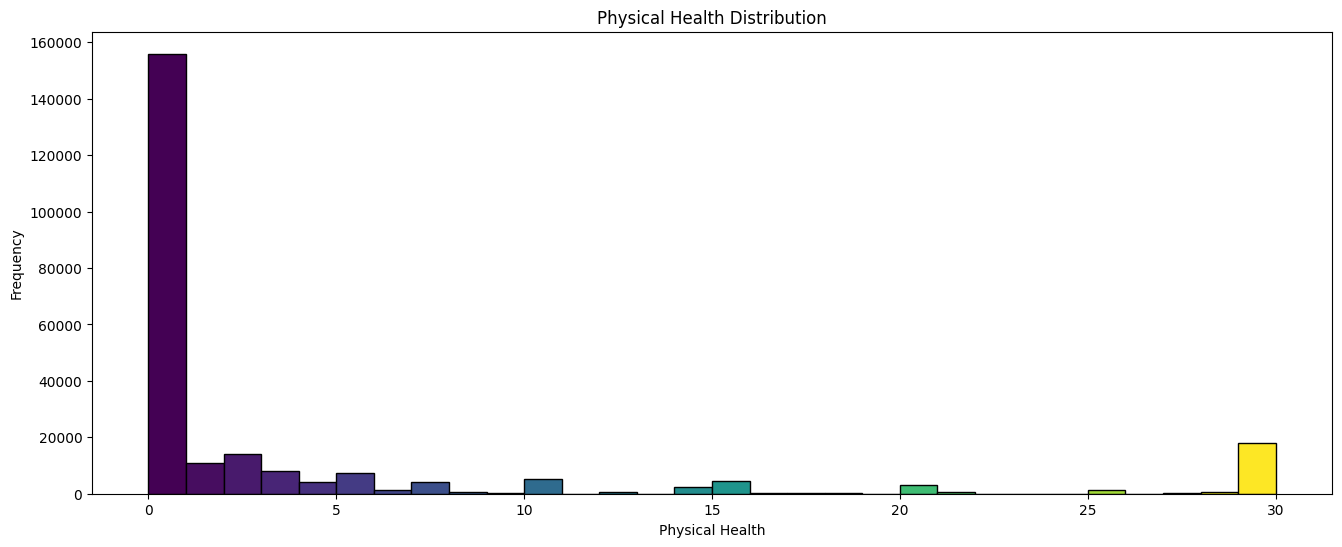

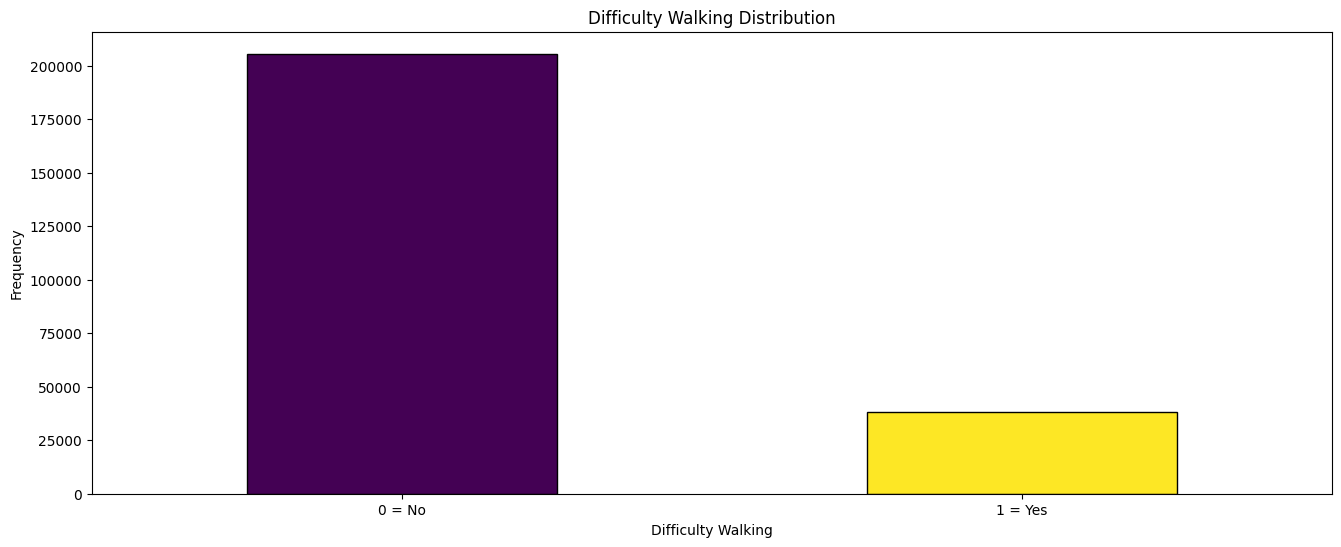

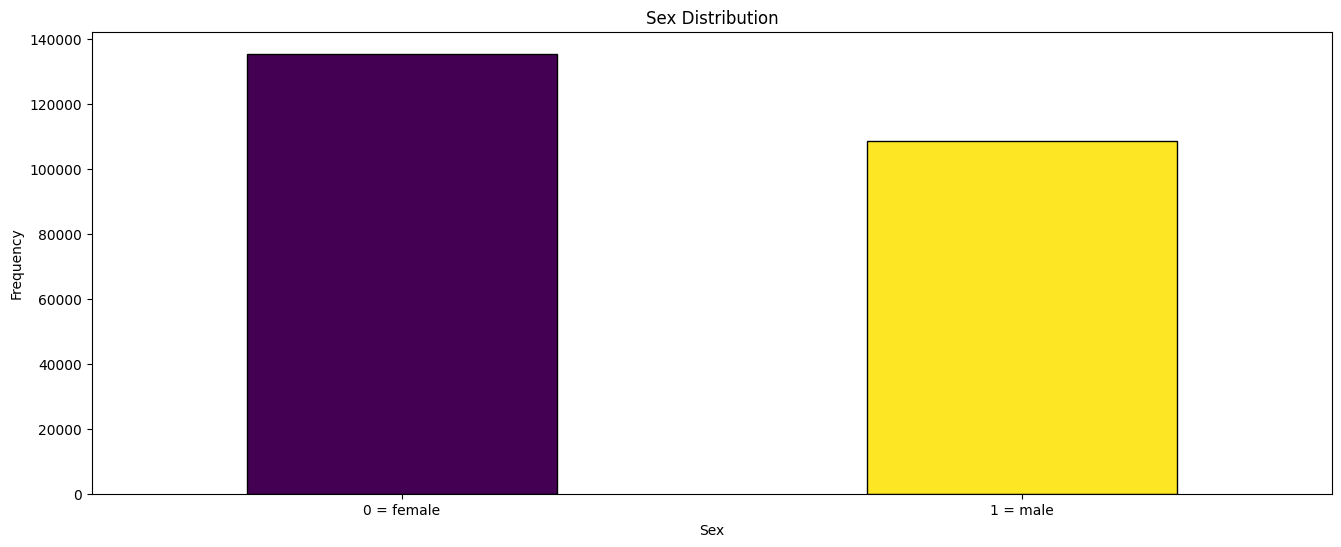

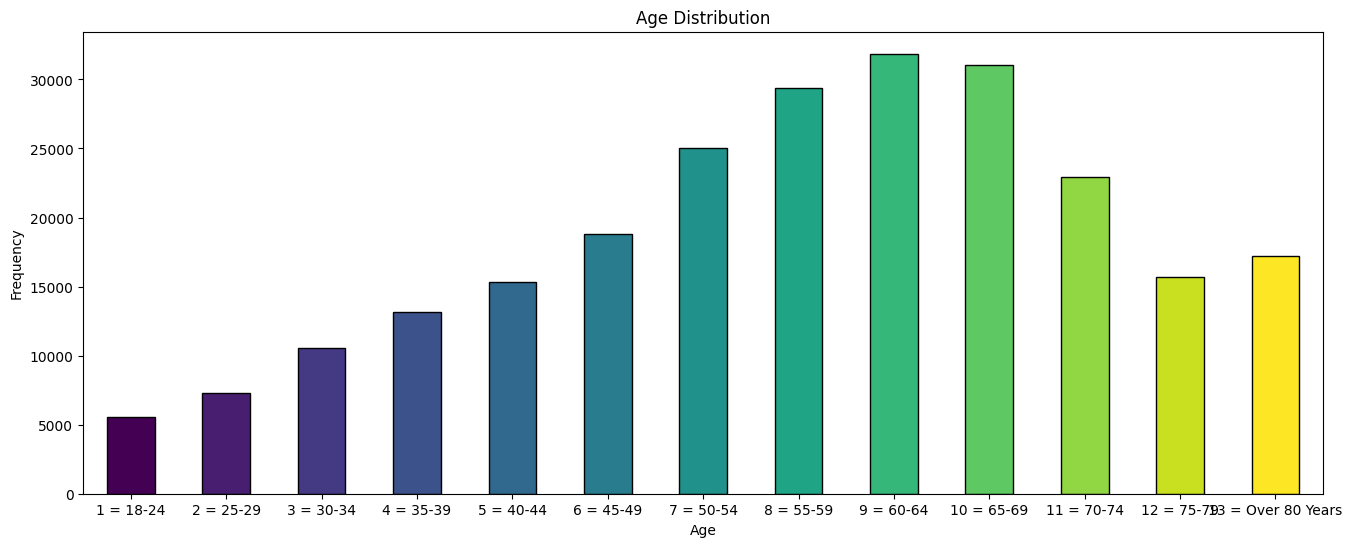

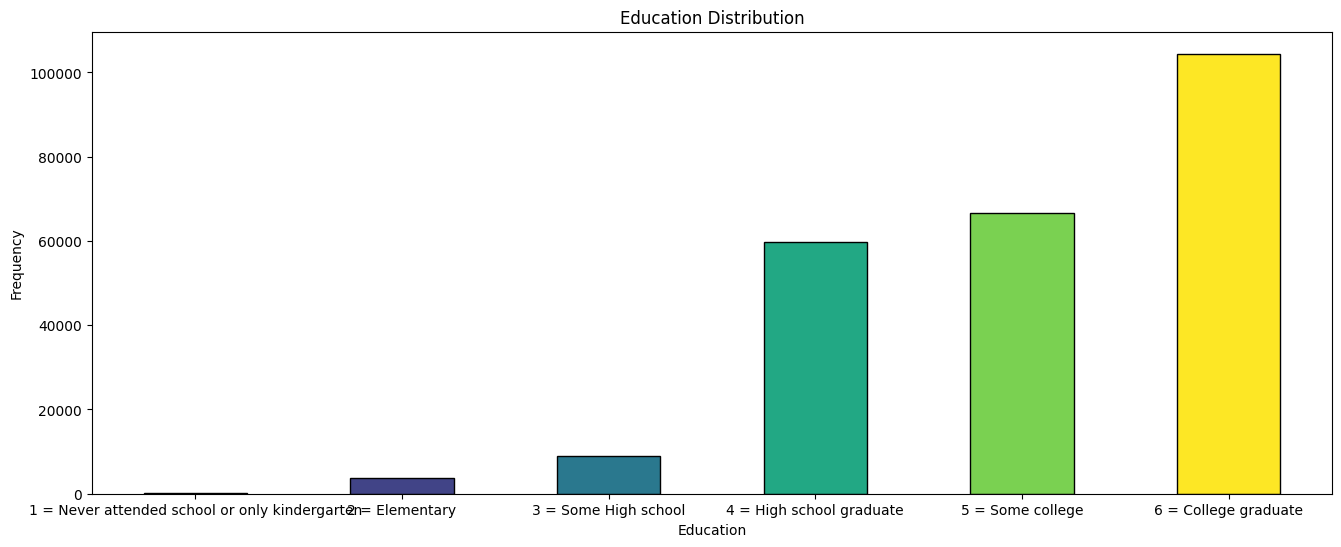

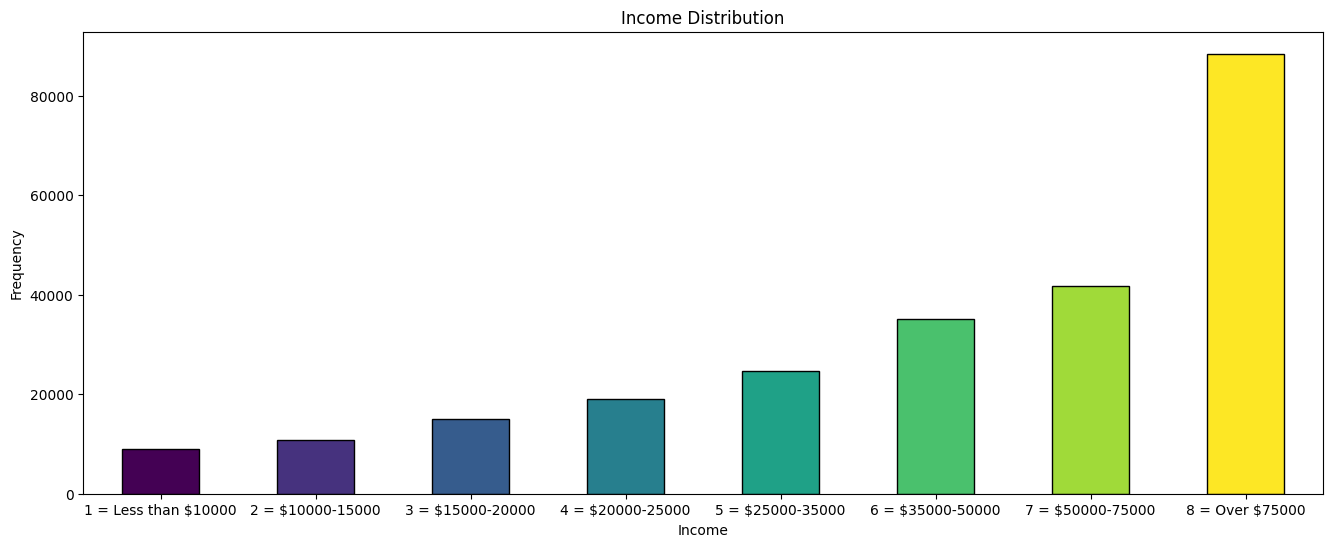

In [ ]:

# Define column metadata
columns_info = {
    'Diabetes_binary': ('0 = No diabetes,1 = Prediabetes,2 = Diabetes', 'Diabetes status', 'Diabetes status Distribution'),
    'HighBP': ('0 = No high BP,1 = High BP', 'Blood pressure level', 'Blood pressure level Distribution'),
    'HighChol': ('0 = No high cholesterol,1 = High cholesterol', 'Cholesterol level', 'Cholesterol level Distribution'),
    'CholCheck': ('0 = no cholesterol check in 5 years,1 = yes cholesterol check in 5 years', 'Cholesterol check', 'Cholesterol check Distribution'),
    'BMI': ('Data as it is', 'Body Mass Index', 'Body Mass Index Distribution'),
    'Smoker': ('0 = No,1 = Yes', 'Smoker', 'Smoker Distribution'),
    'Stroke': ('0 = No,1 = Yes', 'Has Stroke', 'Has Stroke Distribution'),
    'HeartDiseaseorAttack': ('0 = No,1 = Yes', 'Has Heart Disease or Attack', 'Has Heart Disease or Attack Distribution'),
    'PhysActivity': ('0 = No,1 = Yes', 'Physical Activity', 'Physical Activity Distribution'),
    'Fruits': ('0 = No,1 = Yes', 'Takes Fruits', 'Takes Fruits Distribution'),
    'Veggies': ('0 = No,1 = Yes', 'Takes Veggies', 'Takes Veggies Distribution'),
    'HvyAlcoholConsump': ('0 = No,1 = Yes', 'Heavy Alcohol Consumption', 'Heavy Alcohol Consumption Distribution'),
    'AnyHealthcare': ('0 = No,1 = Yes', 'Any Health care', 'Any Health care Distribution'),
    'NoDocbcCost': ('0 = No,1 = Yes', 'Seen a doctor in last 12 months', 'Seen a doctor in last 12 months Distribution'),
    'GenHlth': ('1 = excellent,2 = very good,3 = good,4 = fair', 'General Health', 'General Health Distribution'),
    'MentHlth': ('0 = No,1 = Yes', 'Mental Health', 'Mental Health Distribution'),
    'PhysHlth': ('Data as it is', 'Physical Health', 'Physical Health Distribution'),
    'DiffWalk': ('0 = No,1 = Yes', 'Difficulty Walking', 'Difficulty Walking Distribution'),
    'Sex': ('0 = female,1 = male', 'Sex', 'Sex Distribution'),
    'Age': ('1 = 18-24,2 = 25-29,3 = 30-34,4 = 35-39,5 = 40-44,6 = 45-49,7 = 50-54,8 = 55-59,9 = 60-64,10 = 65-69,11 = 70-74,12 = 75-79,13 = Over 80 Years', 'Age', 'Age Distribution'),
    'Education': ('1 = Never attended school or only kindergarten,2 = Elementary,3 = Some High school,4 = High school graduate,5 = Some college,6 = College graduate', 'Education', 'Education Distribution'),
    'Income': ('1 = Less than $10000,2 = $10000-15000,3 = $15000-20000,4 = $20000-25000,5 = $25000-35000,6 = $35000-50000,7 = $50000-75000,8 = Over $75000', 'Income', 'Income Distribution')
}

# Create plots
for column, (x_labels, x_label, title) in columns_info.items():
    plt.figure(figsize=(16, 6))

    if column in ['BMI', 'MentHlth', 'PhysHlth']:
        # Manually plot histogram with different colors
        data_col = data[column].dropna()
        counts, bins, patches = plt.hist(data_col, bins=30, edgecolor='k')
        for patch, color in zip(patches, plt.cm.viridis(np.linspace(0, 1, len(patches)))):
            patch.set_facecolor(color)
    elif 'Data as it is' in x_labels:
        # Manually plot histogram with different colors
        data_col = data[column].dropna()
        counts, bins, patches = plt.hist(data_col, bins=30, edgecolor='k')
        for patch, color in zip(patches, plt.cm.viridis(np.linspace(0, 1, len(patches)))):
            patch.set_facecolor(color)
    else:
        value_counts = data[column].value_counts().sort_index()
        colors = plt.cm.viridis(np.linspace(0, 1, len(value_counts)))
        value_counts.plot(kind='bar', edgecolor='k', color=colors)
        labels = x_labels.split(',')
        if len(labels) == len(value_counts):
            plt.xticks(ticks=range(len(value_counts)), labels=labels, rotation=0)
        else:
            plt.xticks(ticks=range(len(value_counts)), rotation=0)

    plt.xlabel(x_label)
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

1. The majority of the sample population, approximately 200,000 individuals, are in the "No diabetes" category.The dataset shows a clear imbalance with a high number of non-diabetic individuals.
2. The majority of individuals, around 140,000, have no high blood pressure (BP).This indicates that most of the sample population does not suffer from high blood pressure
3. The bar chart shows that there are approximately 135,000 individuals without high cholesterol and 95,000 individuals with high cholesterol in the dataset.
4. The bar chart shows that, within a 5-year period, approximately 8,000 individuals did not have a cholesterol check while roughly 225,000 individuals did.
5. The histogram reveals that the BMI values in the dataset follow an approximately normal distribution, with a peak around a BMI of 27 and a slight right skew. This pattern indicates that most individuals in the dataset fall within a relatively average BMI range, with a smaller proportion having higher BMI values
6. The dataset shows that a larger proportion of individuals are non-smokers (approximately 130,000) compared to smokers (approximately 100,000)
7. The dataset indicates that significantly fewer individuals have experienced a stroke (approximately 8,000) compared to those who have not (approximately 225,000).
8. The dataset shows that a significantly smaller portion of individuals have experienced heart disease or a heart attack (approximately 20,000) compared to those who have not (approximately 210,000).
9. The dataset illustrates that a significantly larger portion of individuals engage in physical activity (approximately 180,000) compared to those who do not (approximately 50,000)
10. The dataset indicates that a significantly larger portion of individuals consume fruits (approximately 150,000) compared to those who do not (approximately 85,000).
11. The dataset shows that a significantly larger portion of individuals consume vegetables (approximately 190,000) compared to those who do not (approximately 40,000)
12. The dataset shows that a significantly smaller portion of individuals engage in heavy alcohol consumption (approximately 10,000) compared to those who do not (approximately 220,000).
13. The dataset reveals that a significantly larger portion of individuals have access to any healthcare (approximately 220,000) compared to those who do not (approximately 10,000).
14. The dataset reveals that a significantly larger portion of individuals have seen a doctor in the last 12 months (approximately 215,000) compared to those who have not (approximately 15,000).
15. The dataset suggests a positive trend in self-reported general health, with most individuals perceiving their health as "very good." However, a significant portion of the population still reports only "good" or "fair" health, indicating potential areas for health interventions and support
16. The dataset illustrates that a significantly larger portion of individuals do not have mental health (approximately 160,000) compared to those who  have.
17. The dataset illustrates that a significantly larger portion of individuals do not have mental health (approximately 160,000) compared to those who  have.
18. The data set show larger population are college graduates approximately 100,000
19. The dataset show a higher population of males (125,000) compared to females (105,000)
20. The dataset shows that a larger pupulation earn over $ 75,000 approximately 85,000
21. The data set shows that the larger populaton are between 55 and 69 years
22. The data set shows that  a larger population do not have a difficulty in walking  approximately 190,000 compared to those who have a difficulty in walking approximately 25,000


## Bivariate Analysis

### **1. Bivariate Analysis on Diabetes_binary vs Other Risk Factors**
Diabetes_binary, HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack,
PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk,
Sex, Education

Crosstab between Diabetes_binary and HighBP:
HighBP              0.0    1.0
Diabetes_binary               
0.0              131597  75917
1.0                1629   2711
2.0                8163  23816

Chi-square test results: Chi2 = 17087.17, p-value = 0.00e+00



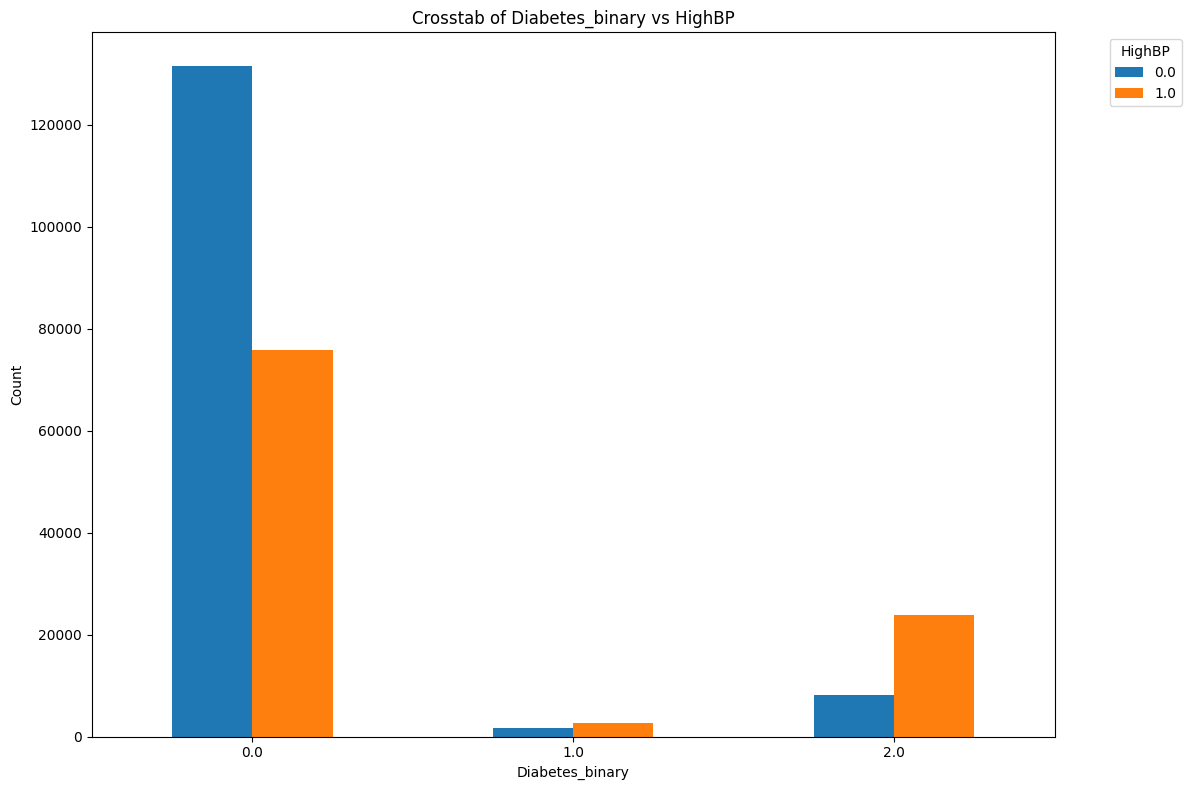

Crosstab between Diabetes_binary and HighChol:
HighChol            0.0    1.0
Diabetes_binary               
0.0              128755  78759
1.0                1629   2711
2.0               10545  21434

Chi-square test results: Chi2 = 10344.66, p-value = 0.00e+00



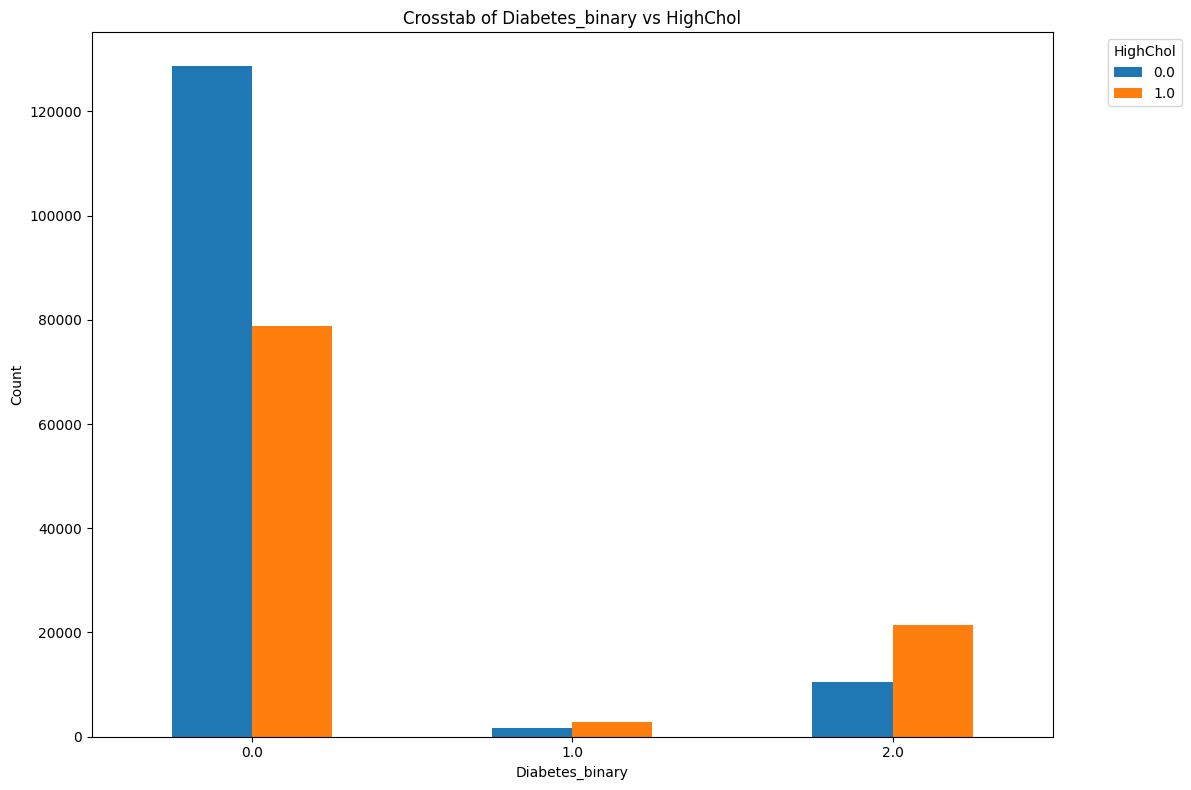

Crosstab between Diabetes_binary and PhysActivity:
PhysActivity       0.0     1.0
Diabetes_binary               
0.0              44743  162771
1.0               1346    2994
2.0              11313   20666

Chi-square test results: Chi2 = 3075.09, p-value = 0.00e+00



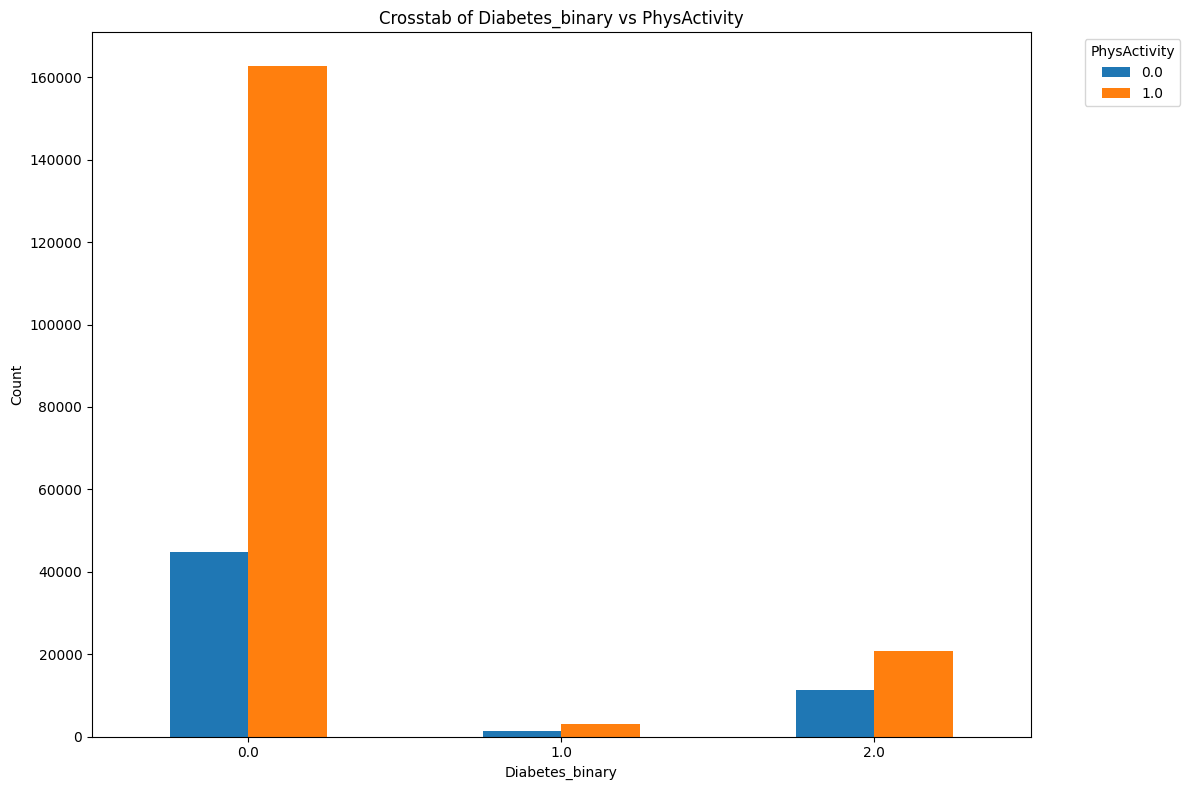

Crosstab between Diabetes_binary and Smoker:
Smoker              0.0    1.0
Diabetes_binary               
0.0              118232  89282
1.0                2201   2139
2.0               15285  16694

Chi-square test results: Chi2 = 989.64, p-value = 1.27e-215



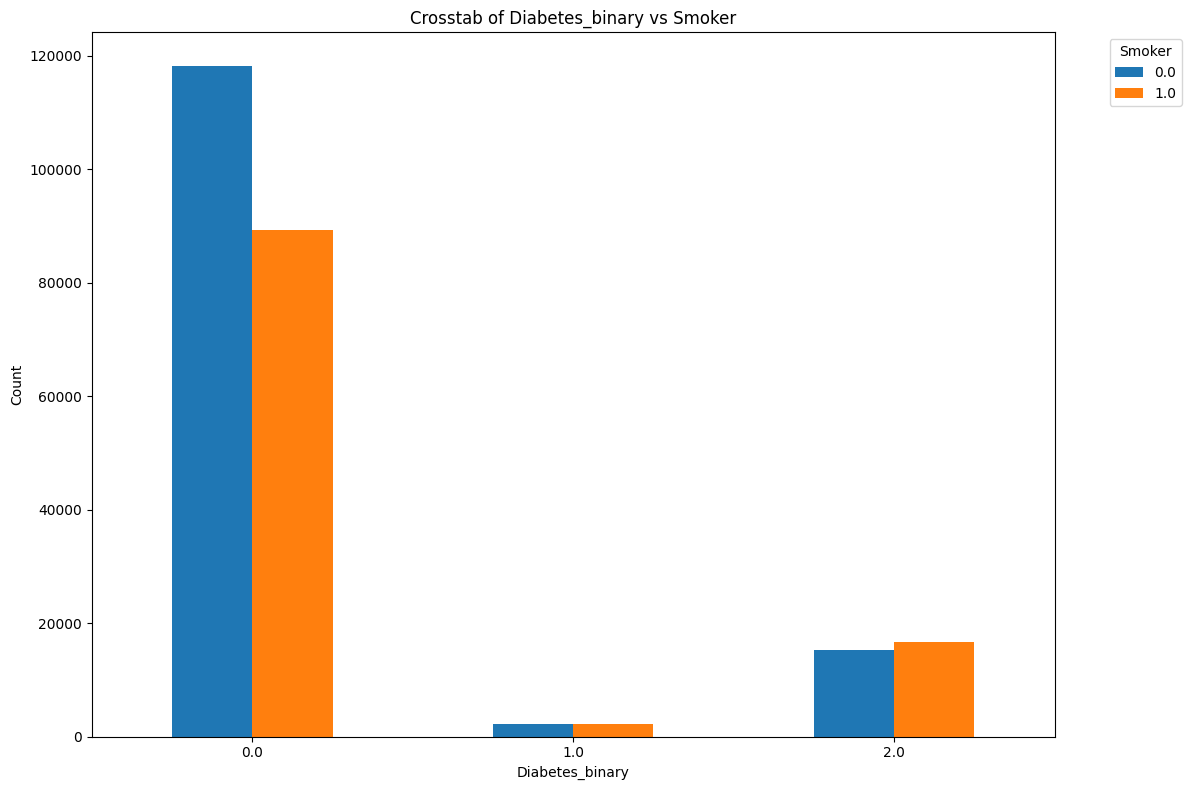

Crosstab between Diabetes_binary and Sex:
Sex                 0.0    1.0
Diabetes_binary               
0.0              116772  90742
1.0                2403   1937
2.0               16152  15827

Chi-square test results: Chi2 = 372.74, p-value = 1.15e-81



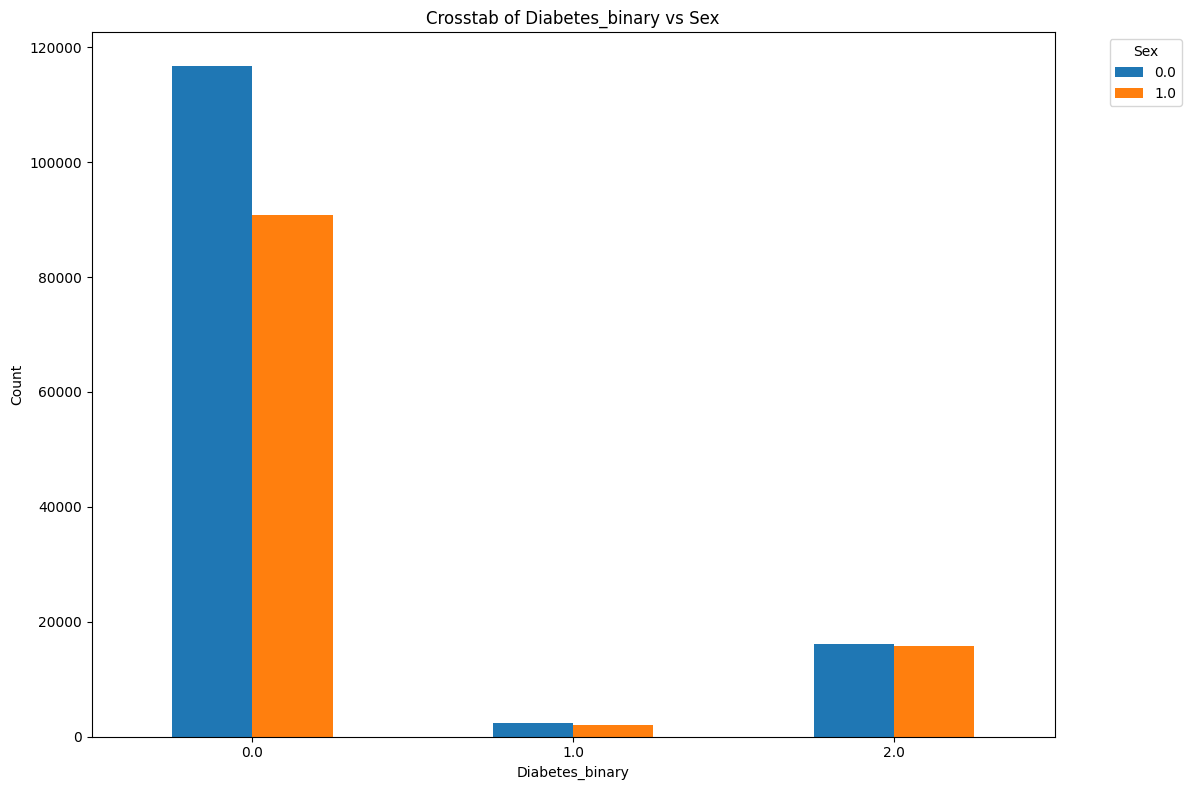

Crosstab between Diabetes_binary and Education:
Education        1.0   2.0   3.0    4.0    5.0    6.0
Diabetes_binary                                      
0.0              120  2591  6558  48609  56187  93449
1.0                1   153   289   1271   1238   1388
2.0               41  1077  2029   9945   9270   9617

Chi-square test results: Chi2 = 4120.85, p-value = 0.00e+00



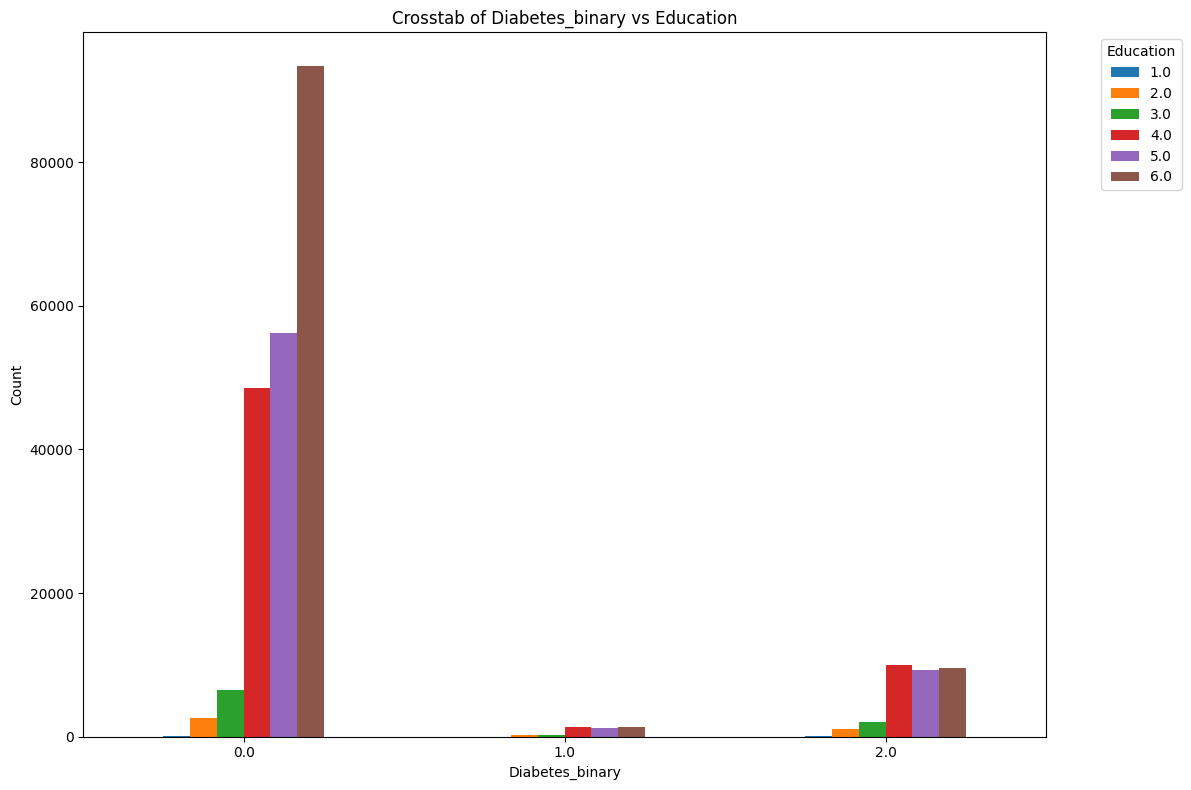

Crosstab between Diabetes_binary and Age:
Age              1.0   2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0   \
Diabetes_binary                                                                
0.0              5465  7103  10245  12528  14309  17057  21997  25211  26084   
1.0                21    48     54    128    147    264    387    501    657   
2.0                71   107    248    520    851   1460   2641   3697   5122   

Age               10.0   11.0   12.0   13.0  
Diabetes_binary                              
0.0              24367  17519  12007  13622  
1.0                666    586    429    452  
2.0               5982   4859   3265   3156  

Chi-square test results: Chi2 = 9661.36, p-value = 0.00e+00



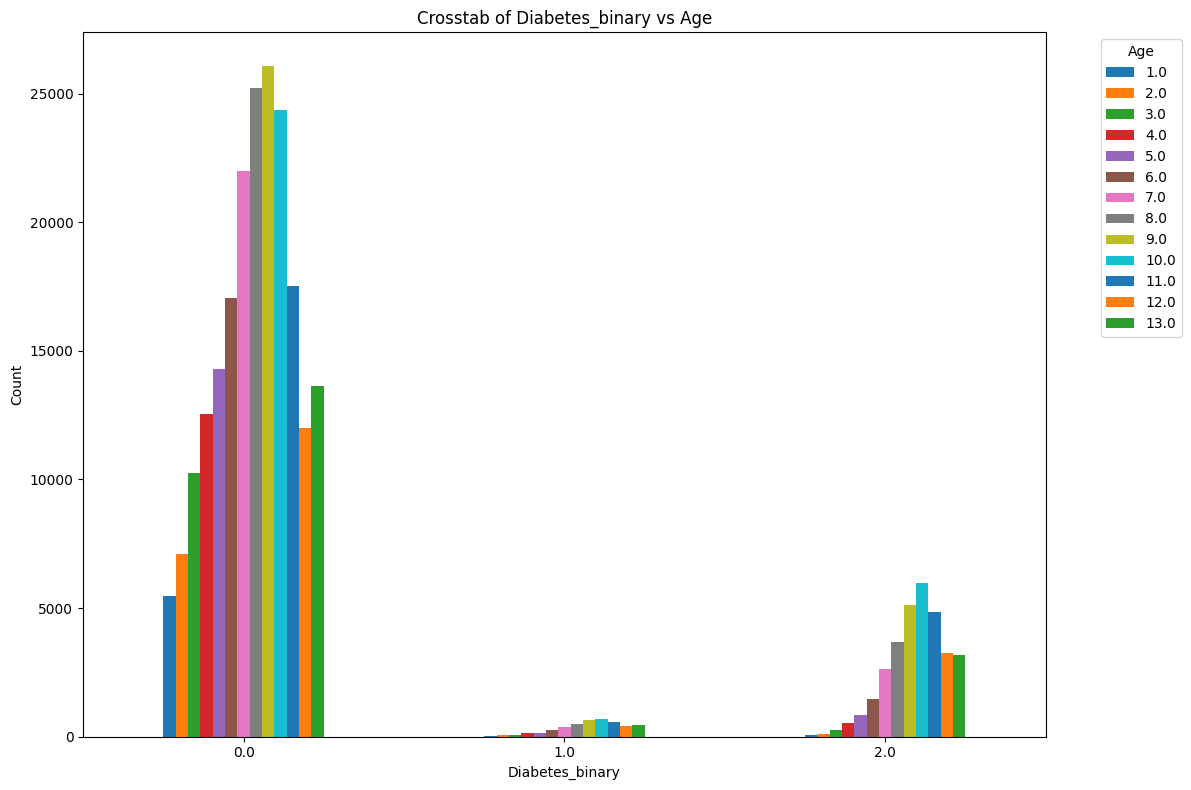

Crosstab between Diabetes_binary and BMI:
BMI              14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0   22.0   23.0  \
Diabetes_binary                                                                 
0.0                36   120   326   719  1705  3795  6039  9301  12811  14541   
1.0                 1     0     2     9    15    38    47    75    141    156   
2.0                 4    12    20    48    83   135   241   479    691    913   

BMI               24.0   25.0   26.0   27.0   28.0   29.0   30.0  31.0  32.0  \
Diabetes_binary                                                                
0.0              17849  15460  18275  21423  14002  12371  11909  9891  8077   
1.0                232    235    285    426    292    288    342   272   277   
2.0               1469   1451   2002   2757   2251   2231   2322  2112  2120   

BMI              33.0  34.0  35.0  36.0  37.0  38.0  39.0  40.0  41.0  
Diabetes_binary                                                        
0.0    

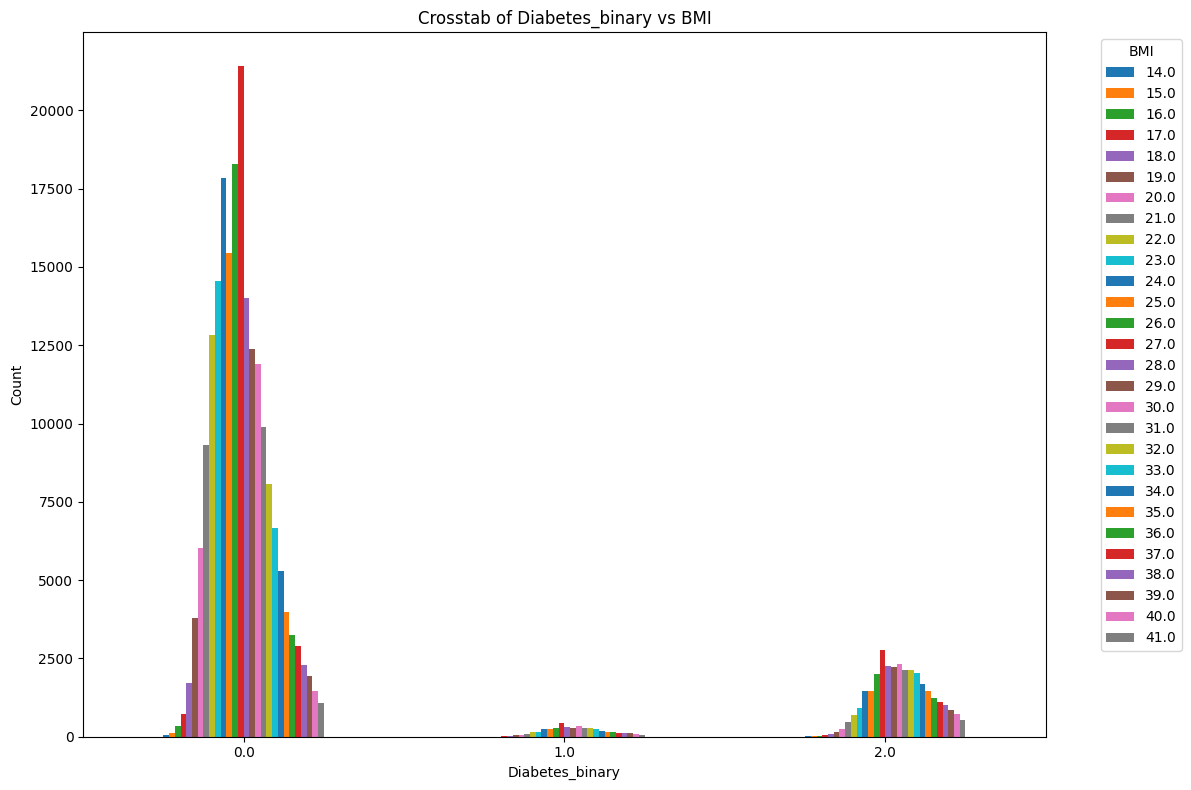

In [ ]:
# Function to create a crosstab and perform chi-square test for categorical variables
from scipy.stats import chi2_contingency
def crosstab_analysis(data, col1, col2):
    crosstab = pd.crosstab(data[col1], data[col2])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Crosstab between {col1} and {col2}:")
    print(crosstab)
    print(f"\nChi-square test results: Chi2 = {chi2:.2f}, p-value = {p:.2e}\n")

    crosstab.plot(kind='bar', figsize=(12, 8))
    plt.title(f'Crosstab of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(title=col2, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Continuous variables for correlation matrix
continuous_vars = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'GenHlth', 'Income']

# List of categorical variables
categorical_vars = ['Diabetes_binary', 'HighBP', 'HighChol', 'PhysActivity', 'Smoker', 'Sex', 'Education']

# Example crosstab analysis between categorical variables
crosstab_analysis(data, 'Diabetes_binary', 'HighBP')
crosstab_analysis(data, 'Diabetes_binary', 'HighChol')
crosstab_analysis(data, 'Diabetes_binary', 'PhysActivity')
crosstab_analysis(data, 'Diabetes_binary', 'Smoker')
crosstab_analysis(data, 'Diabetes_binary', 'Sex')
crosstab_analysis(data, 'Diabetes_binary', 'Education')
crosstab_analysis(data, 'Diabetes_binary', 'Age')
crosstab_analysis(data, 'Diabetes_binary', 'BMI')

### **Observations**
**Diabetes_binary vs HighBP:**

    The crosstab shows a higher proportion of diabetes cases among individuals with high blood pressure (HighBP = 1) compared to those without high blood pressure (HighBP = 0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 16602 individuals have high blood pressure compared to 5861 who do not.

**Diabetes_binary vs HighChol:**

    The crosstab indicates that a higher proportion of individuals with diabetes have high cholesterol (HighChol = 1) compared to those without high cholesterol (HighChol = 0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 12193 individuals have high cholesterol compared to 7270 who do not.

**Diabetes_binary vs Smoker:**

    The crosstab shows that the proportion of diabetes cases is higher among smokers (Smoker = 1) compared to non-smokers (Smoker = 0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 9352 individuals are smokers compared to 10111 who are non-smokers.

**Diabetes_binary vs Stroke:**

    The crosstab indicates that a higher proportion of individuals with diabetes have had a stroke (Stroke = 1) compared to those who have not had a stroke (Stroke = 0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 1118 individuals have had a stroke compared to 18345 who have not.

**Diabetes_binary vs HeartDiseaseorAttack:**

    The crosstab reveals a higher proportion of diabetes cases among individuals with a history of coronary heart disease or myocardial infarction (HeartDiseaseorAttack = 1) compared to those without such history (HeartDiseaseorAttack = 0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 3068 individuals have a history of heart disease or attack compared to 16415 who do not.

**Diabetes_binary vs Sex:**

    The crosstab shows a slightly higher proportion of diabetes cases among males (Sex = 1) compared to females (Sex = 0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 10467 are males compared to 8996 who are females.

**Diabetes_binary vs Education:**

    The crosstab indicates that the majority of diabetes cases are among individuals with some college education or higher (Education levels 4.0, 5.0, and 6.0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 15708 individuals have education levels 4.0, 5.0, or 6.0 compared to 795 individuals with education levels 1.0, 2.0, or 3.0.

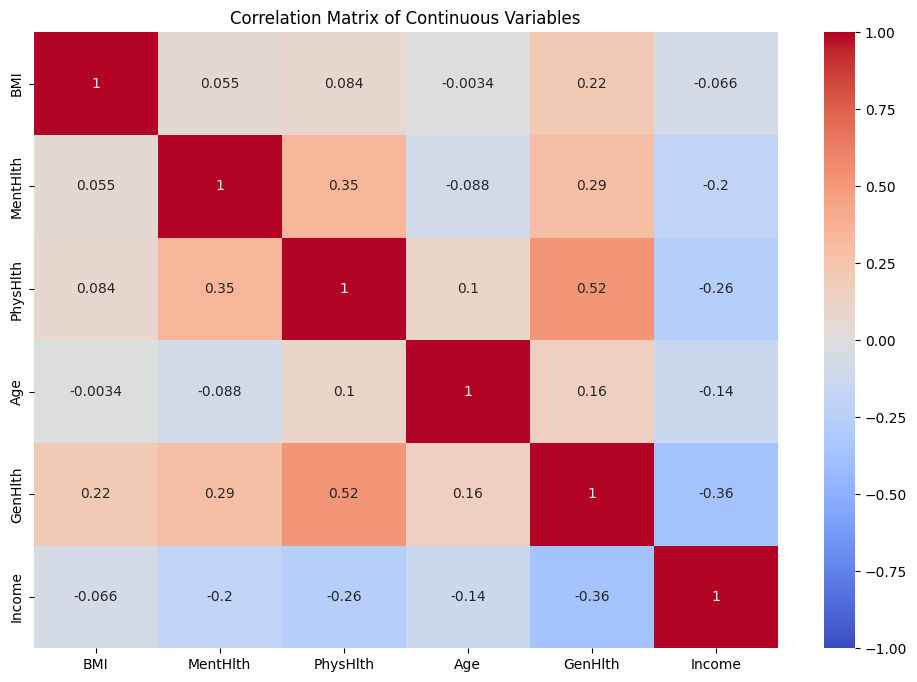

In [ ]:
# Correlation matrix for continuous variables
plt.figure(figsize=(12, 8))
correlation_matrix = data[continuous_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Continuous Variables')
plt.show()


Key observations from the matrix:

- BMI and GenHlth show a moderate positive correlation (0.37), indicating that higher BMI is somewhat associated with poorer general health.
- BMI and Age also have a moderate positive correlation (0.24), suggesting that BMI tends to increase with age.
- GenHlth and MentHlth have a moderate positive correlation (0.15), indicating a slight association between general health and mental health.
- Income and Age show a moderate negative correlation (-0.31), implying that older age groups tend to have lower income levels.

### **2. HighBP vs Other Variables**
Age, BMI, GenHlth, PhysHlth

Age: Check if age is associated with high blood pressure.

BMI: Analyze the relationship between BMI and high blood pressure.

PhysActivity: Determine if physical activity is associated with high blood pressure.

GenHlth: Analyze the relationship between general health and high blood pressure.

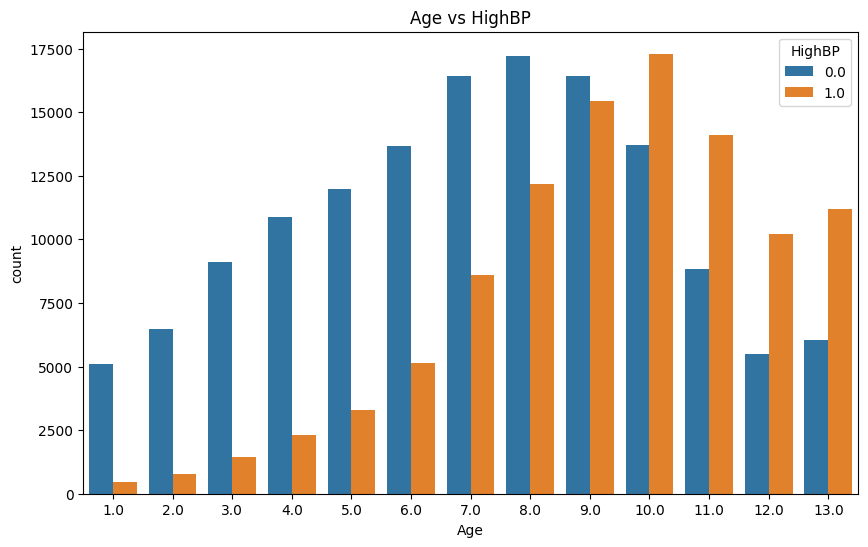

In [ ]:
#code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Age vs HighBP
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='HighBP', data=data)
plt.title('Age vs HighBP')
plt.show()

**HighBP vs Age:**

- The count plot indicates that a higher proportion of older individuals have high blood pressure (HighBP = 1) compared to younger individuals.
- Specifically, out of the total cases, there are more individuals with high blood pressure in higher age categories, suggesting a positive correlation between age and high blood pressure.
- Also, people of age band 8 to age band 9 (55-64)without High blood pressure are more susceptible to getting High Blood Pressure and, therefore are more likely to be diabetic

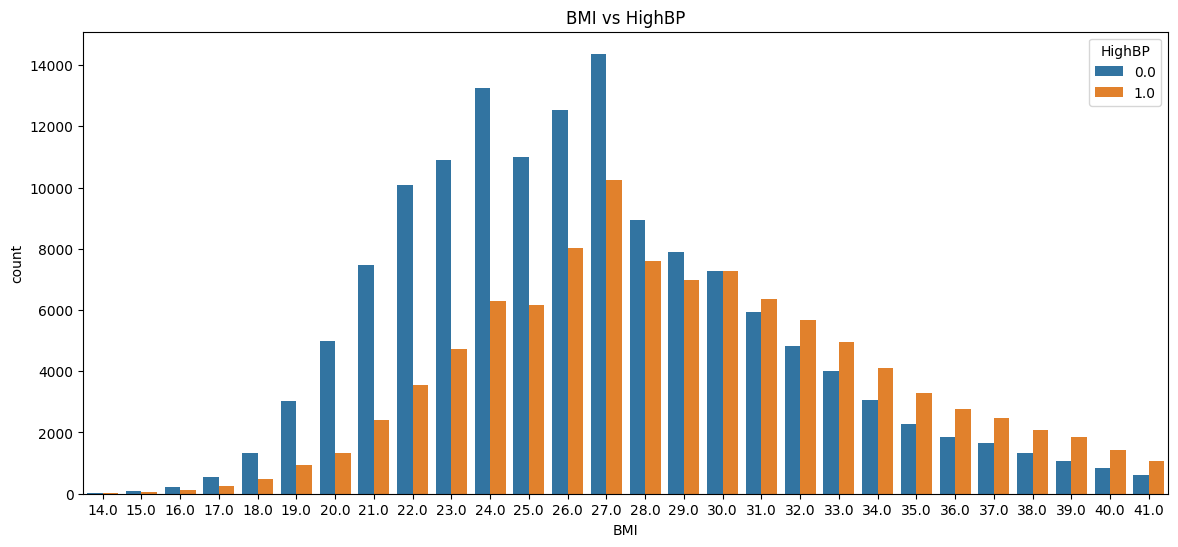

In [ ]:
# 2. BMI vs HighBP
plt.figure(figsize=(14, 6))
sns.countplot(x='BMI', hue='HighBP', data=data)
plt.title('BMI vs HighBP')
plt.show()

**HighBP vs BMI:**

- The count plot shows that people who have a BMI of 24 are the least likely to have high blood pressure while also having a relatively high BMI
- A BMI of 27 has the highest frequency for those with and without High Blood pressure
- Overall, people with a BMI of below 27 are less likely to have high blood pressure but people who have a BMI above 27 are screwed High blood pressure is following them like the police on subway surfers
- Specifically, individuals with a higher BMI are more likely to have high blood pressure, indicating a positive relationship between BMI and high blood pressure.


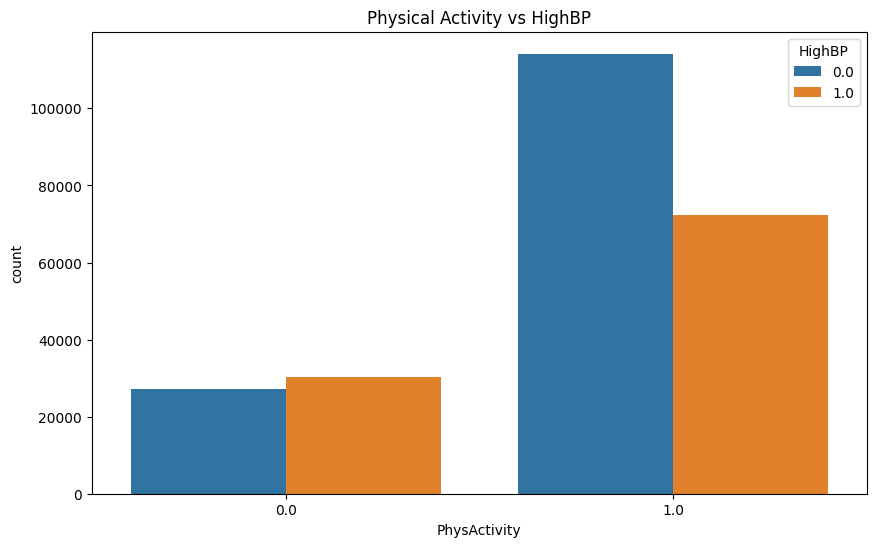

In [ ]:
# 3. PhysActivity vs HighBP
plt.figure(figsize=(10, 6))
sns.countplot(x='PhysActivity', hue='HighBP', data=data)
plt.title('Physical Activity vs HighBP')
plt.show()

**HighBP vs PhysActivity:**

- The count plot reveals that the proportion of people who engage in physical activities are less likely to have high blood pressure compared to those who do not
- The people who engage in physical activity and have high blood pressure are more than those who do not have a high blood pressure
- The frequency of the people who engage in physical activity and don't have high blood pressure is higher than everyone with a high BP whether they work out or not

<function matplotlib.pyplot.show(close=None, block=None)>

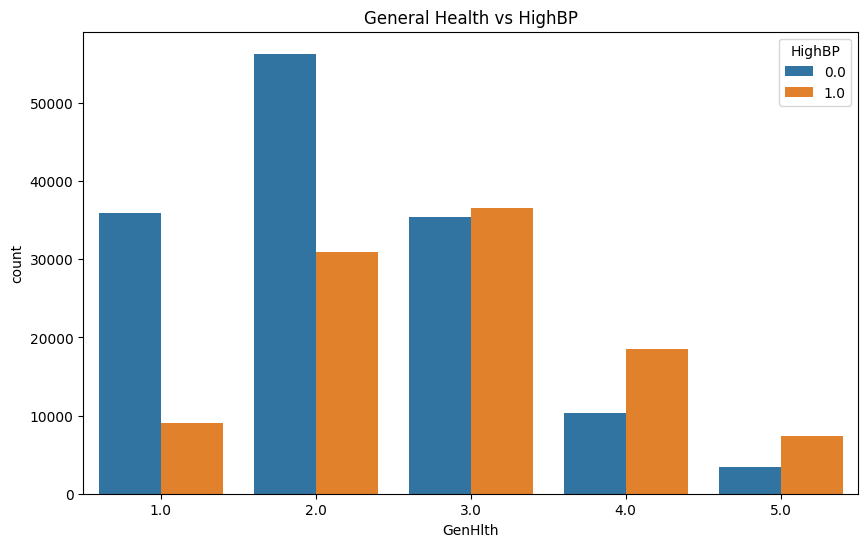

In [ ]:
# 4. GenHlth vs HighBP
plt.figure(figsize=(10, 6))
sns.countplot(x='GenHlth', hue='HighBP', data=data)
plt.title('General Health vs HighBP')
plt.show

**HighBP vs GenHlth:**

- The count plot indicates that individuals who report poorer general health (higher values of GenHlth) are more likely to have high blood pressure (HighBP = 1) compared to those who report better general health.
- Specifically, there is a clear trend showing that worse general health is associated with a higher likelihood of having high blood pressure, highlighting the connection between overall health and blood pressure levels.

-------------------------------------------------------------------------------------------------------------------------------------------

### **3. HighChol vs Other Variables**
Age, BMI, GenHlth, PhysHlth

Age: Check the relationship between Age and high cholesterol.

BMI: Check the relationship between BMI and high cholesterol

PhysActivity: Determine if physical activity is associated with high cholesterol.

GenHlth: Analyze the relationship between general health and high cholesterol.

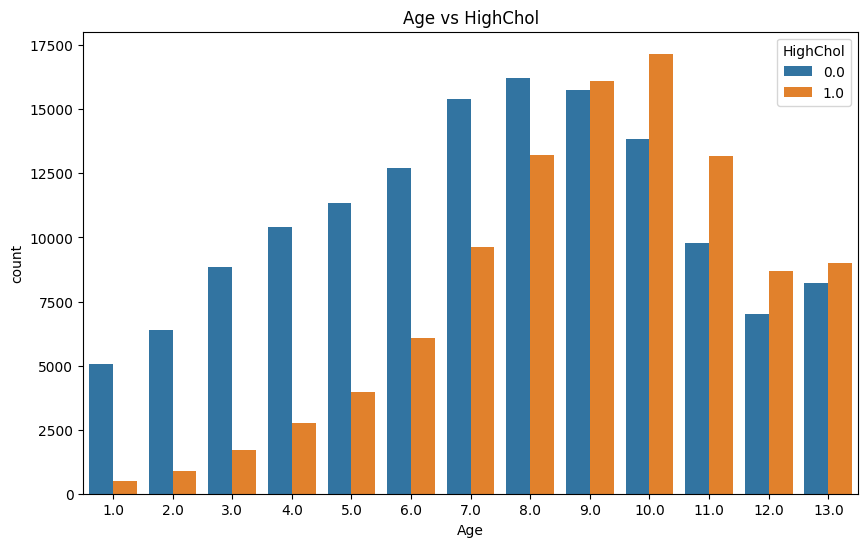

In [ ]:
# 0. Age vs HighChol
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='HighChol', data=data)
plt.title('Age vs HighChol')
plt.show()

**HighCol vs Age:**

- The count plot shows that as people age their risk factor for high cholesterol increases
- When people get to the age bracket 9 (age 60 and above) their likelihood they have high cholesterol is close to a 50/50 chance
- People who are in age bracket 10 and above (ages 65 and above) have high cholesterol compared to those who do not in their age brackets

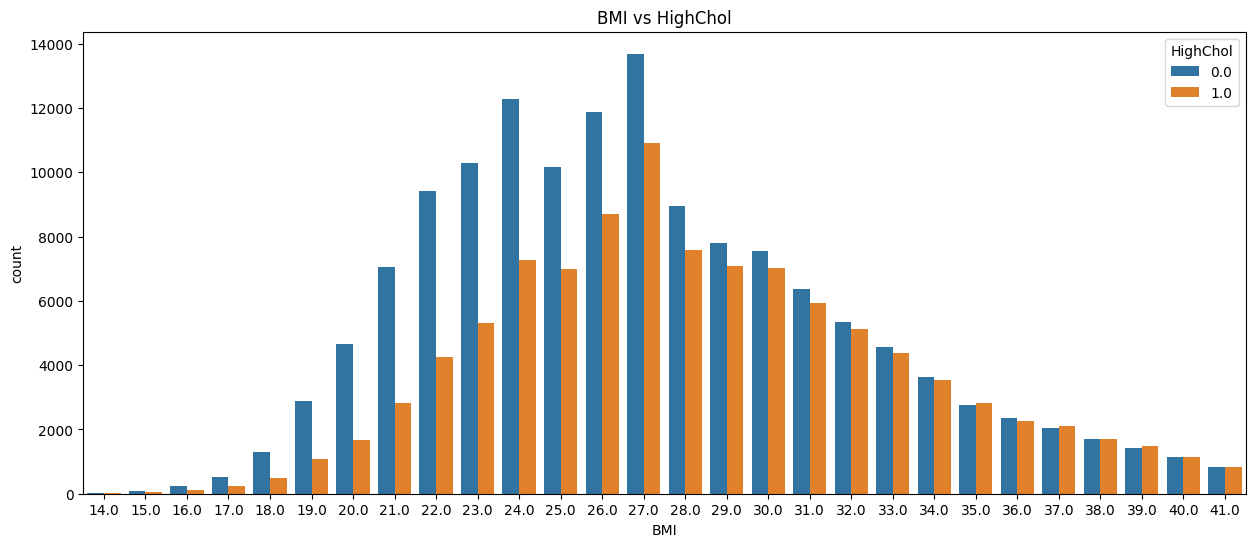

In [ ]:
# 1. BMI vs HighChol
plt.figure(figsize=(15, 6))
sns.countplot(x='BMI', hue='HighChol', data=data)
plt.title('BMI vs HighChol')
plt.show()

**HighCol vs BMI:**

- The count plot shows that the lower your BMI the lower your risk factor for high cholesterol people who have a BMI of 24 are the least likely to have high cholesterol while also having a relatively high BMI
- A BMI of 27 has the highest frequency for those with and without High cholesterol
- Overall, people with a BMI of below 27 are less likely to have high cholesterol but people who have a BMI above 27 are screwed high cholesterol has a vendetta
- Specifically, individuals with a higher BMI are more likely to have high cholesterol, indicating a positive relationship between BMI and high cholesterol.

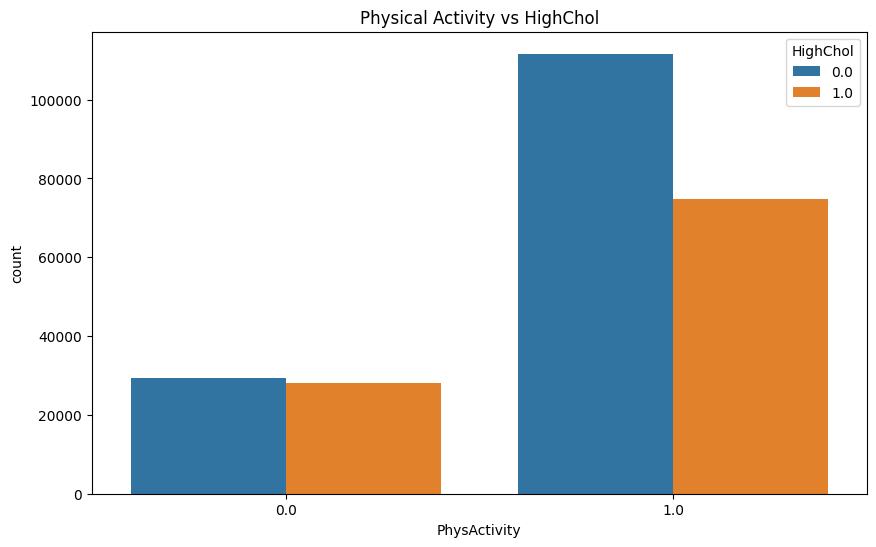

In [ ]:
# 2. PhysActivity vs HighChol
plt.figure(figsize=(10, 6))
sns.countplot(x='PhysActivity', hue='HighChol', data=data)
plt.title('Physical Activity vs HighChol')
plt.show()

**HighChol vs PhysActivity:**

- The count plot reveals that the proportion of people who engage in physical activities is less likely to have high cholesterol compared to those who do not.
- The people who engage in physical activity and have high cholesterol are more than those who do not have high cholesterol.
- The frequency of the people who engage in physical activity and don't have high cholesterol is higher than everyone with high cholesterol, whether they work out or not.

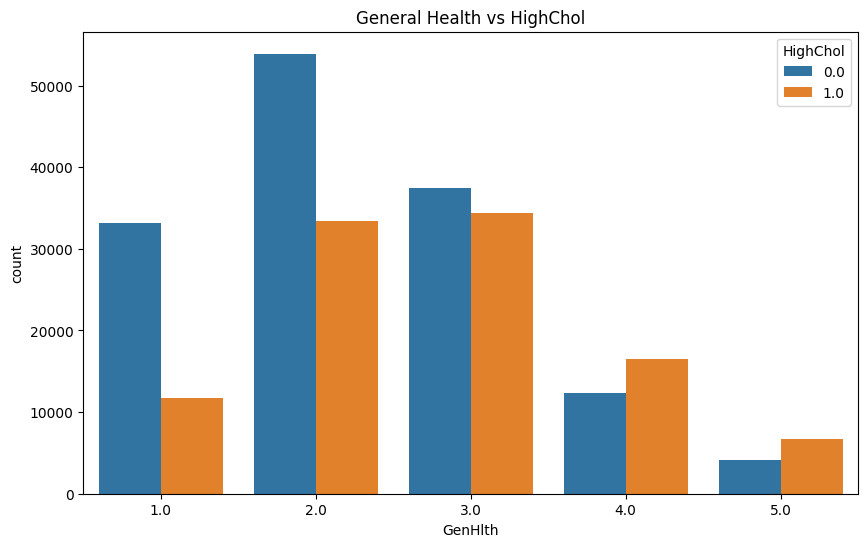

In [ ]:
# 3. GenHlth vs HighChol
plt.figure(figsize=(10, 6))
sns.countplot(x='GenHlth', hue='HighChol', data=data)
plt.title('General Health vs HighChol')
plt.show()

**HighChol vs GenHlth:**

- The count plot indicates that individuals who report poorer general health (higher values of GenHlth) are more likely to have high cholesterol (HighChol = 1) compared to those who report better general health.
- Specifically, there is a clear trend showing that worse general health is associated with a higher likelihood of having high cholesterol, highlighting the connection between overall health and cholesterol levels.

-------------------------------------------------------------------------------------------------------------------------------------------

### **4. BMI vs Other Variables**

    PhysActivity: Analyze the relationship between physical activity and BMI.
    
    GenHlth: Determine the relationship between general health and BMI.
    
    Age: Check the relationship between age and BMI.

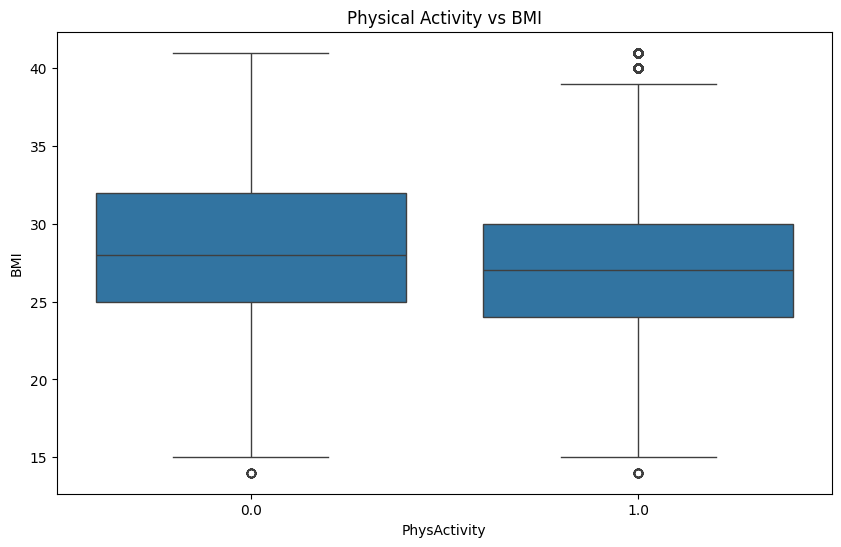

In [ ]:
# 1. PhysActivity vs BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x='PhysActivity', y='BMI', data=data)
plt.title('Physical Activity vs BMI')
plt.show()

**BMI vs PhysActivity**

The box plot shows that individuals with higher BMI values are less likely to engage in regular physical activity (PhysActivity = 0). Conversely, individuals with lower BMI values tend to engage in more physical activity (PhysActivity = 1). This indicates a negative relationship between BMI and physical activity levels.


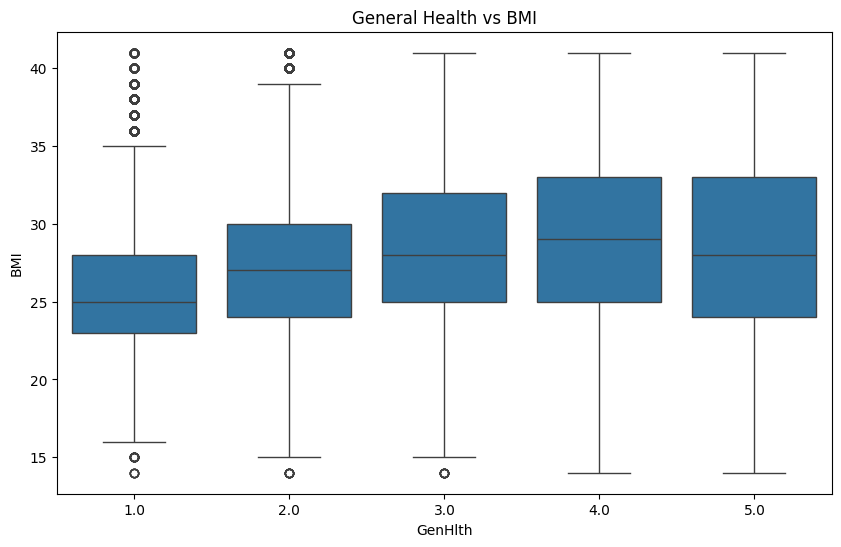

In [ ]:
# 2. GenHlth vs BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x='GenHlth', y='BMI', data=data)
plt.title('General Health vs BMI')
plt.show()

**BMI vs GenHlth**

The box plot indicates that individuals who report poorer general health (higher GenHlth scores) tend to have higher BMI values. Conversely, those who report better general health (lower GenHlth scores) tend to have lower BMI values. This suggests that higher BMI is associated with poorer general health.

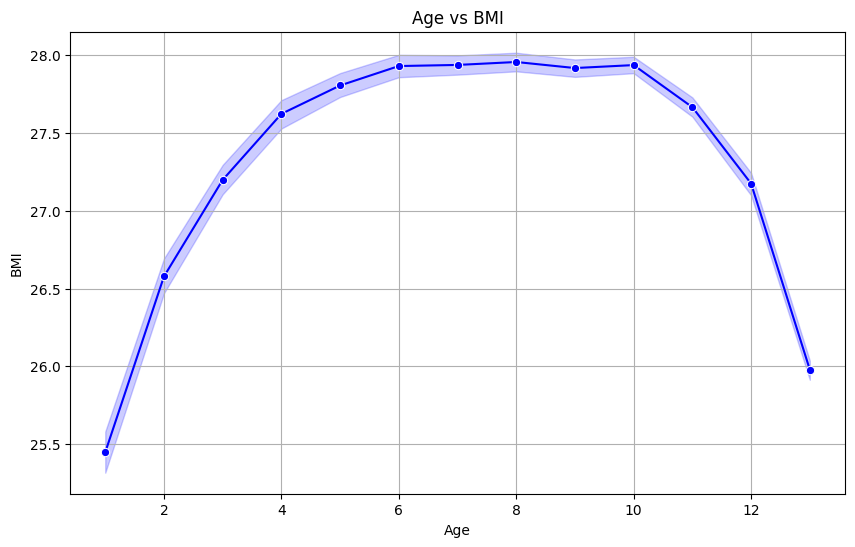

In [ ]:
# 3. Age vs BMI
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='BMI', data=data, marker='o', linestyle='-', color='blue')
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

**BMI vs Age**

The scatter plot shows a positive correlation between age and BMI. As age increases, there tends to be a slight increase in BMI. However, there is considerable variation within each age group, indicating that while age is a factor, it is not the sole determinant of BMI.

-------------------------------------------------------------------------------------------------------------------------------------------

### **5. GenHlth vs Other Variables**
Age, BMI, MentHlth, PhysHlth

- MentHlth: Analyze the relationship between mental health and general health.

- PhysHlth: Determine the relationship between physical health and general health.

- PhysActivity: Check if physical activity is associated with general health.

- Age: Analyze the relationship between age and general health.

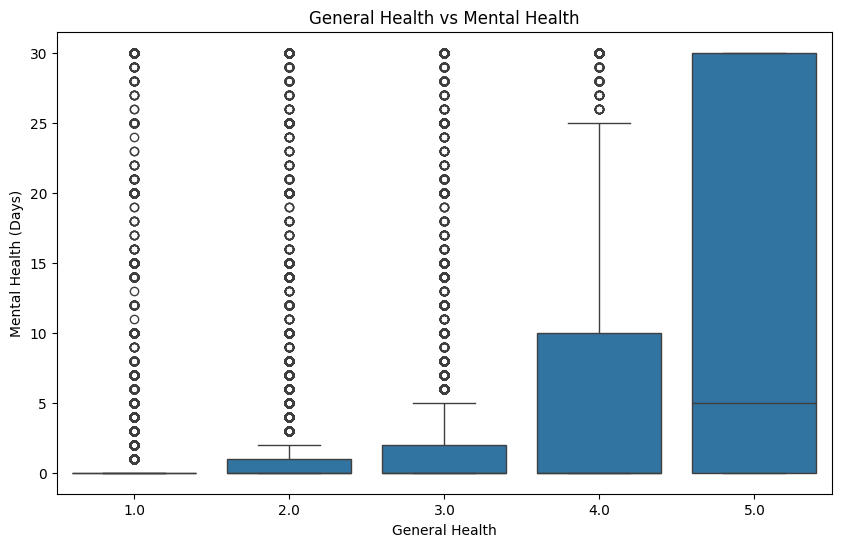

In [ ]:
# 1. MentHlth vs GenHlth
plt.figure(figsize=(10, 6))
sns.boxplot(x='GenHlth', y='MentHlth', data=data)
plt.title('General Health vs Mental Health')
plt.xlabel('General Health')
plt.ylabel('Mental Health (Days)')
plt.show()

**GenHlth vs MentHlth**

    The scatter plot shows a positive correlation between general health (GenHlth) and mental health (MentHlth). Individuals reporting poorer general health (higher GenHlth scores) also report a higher number of days with poor mental health (higher MentHlth scores). This suggests that poorer general health is associated with poorer mental health.

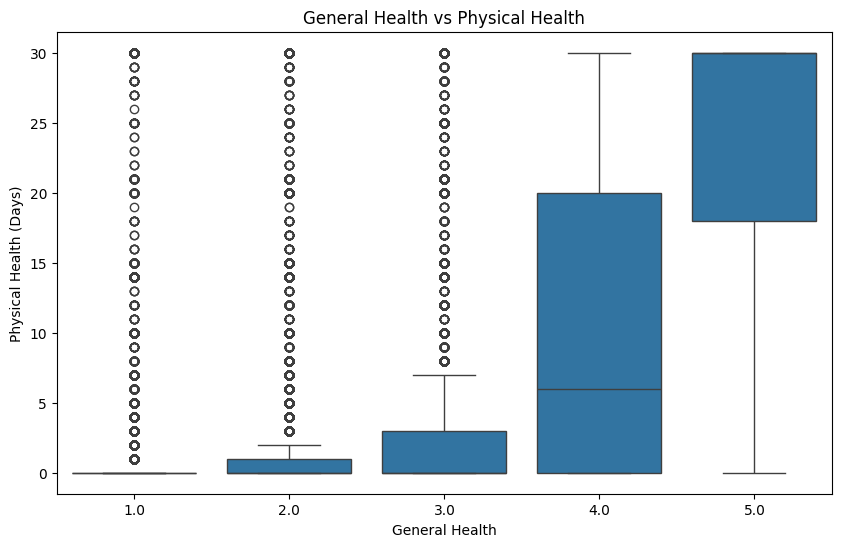

In [ ]:
# 2. PhysHlth vs GenHlth
plt.figure(figsize=(10, 6))
sns.boxplot(x='GenHlth', y='PhysHlth', data=data)
plt.title('General Health vs Physical Health')
plt.xlabel('General Health')
plt.ylabel('Physical Health (Days)')
plt.show()

**GenHlth vs PhysHlth**

    The scatter plot indicates a positive correlation between general health (GenHlth) and physical health (PhysHlth). Individuals with poorer general health (higher GenHlth scores) report a much much higher number of days with poor physical health (higher PhysHlth scores). This implies that poorer general health is associated with poorer physical health.
    

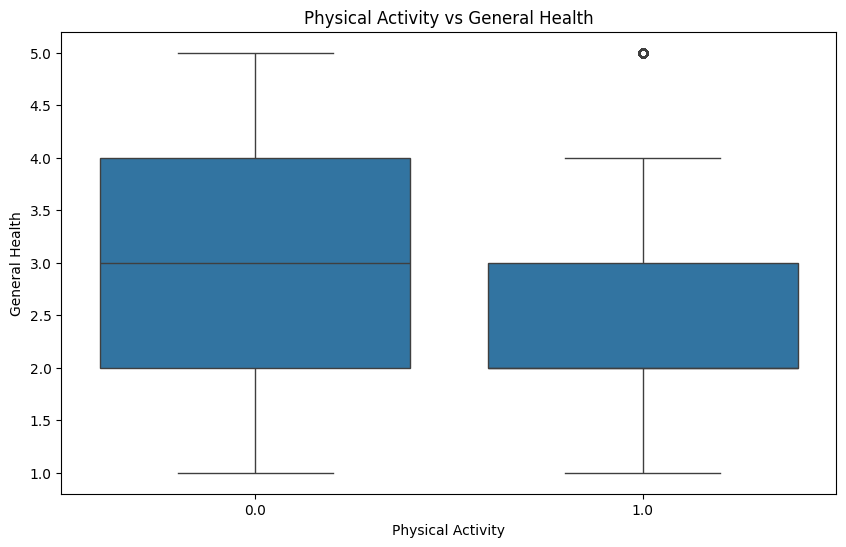

In [ ]:
# 3. PhysActivity vs GenHlth
plt.figure(figsize=(10, 6))
sns.boxplot(x='PhysActivity', y='GenHlth', data=data)
plt.title('Physical Activity vs General Health')
plt.xlabel('Physical Activity')
plt.ylabel('General Health')
plt.show()

**GenHlth vs PhysActivity**

    The box plot shows that individuals who engage in regular physical activity (PhysActivity = 1) tend to report better general health (lower GenHlth scores). It is almost 1 to 1

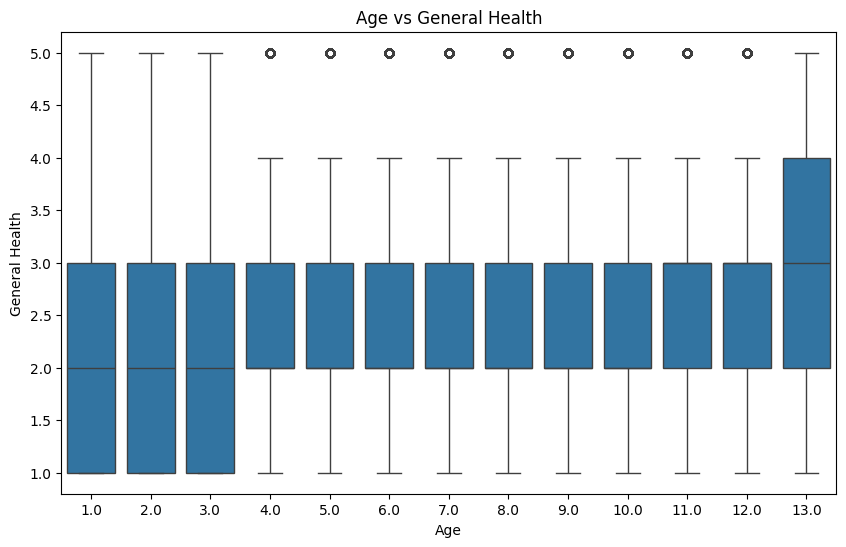

In [ ]:
# 4. Age vs GenHlth
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='GenHlth', data=data)
plt.title('Age vs General Health')
plt.xlabel('Age')
plt.ylabel('General Health')
plt.show()


**GenHlth vs Age**

    The scatter plot shows a varied relationship between age and general health (GenHlth). While younger individuals generally report better general health (lower GenHlth scores), there is a noticeable increase in poorer general health (higher GenHlth scores) among older individuals. However, there is considerable variability within each age group, indicating that age alone does not determine general health.

-------------------------------------------------------------------------------------------------------------------------------------------

### **6. Diabetes Binary vs Continous Variables**

continuous_vars = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'GenHlth', 'Income']

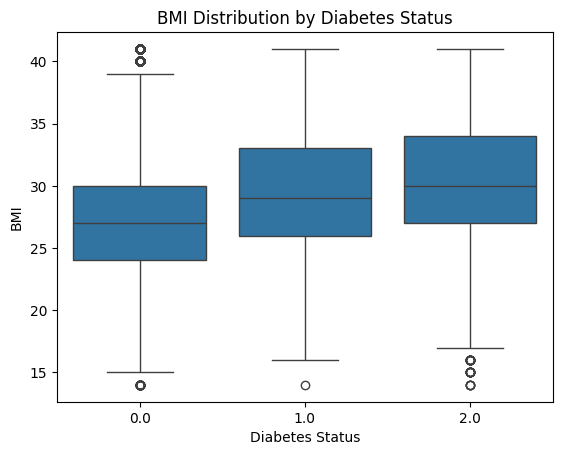

In [ ]:
# Example of Box Plot
sns.boxplot(x='Diabetes_binary', y='BMI', data=data)
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.show()

**Diabetes_binary vs BMI**

    The box plot indicates that individuals with diabetes (Diabetes_binary = 2) generally have a higher BMI compared to those with diabetes (Diabetes_binary = 1) and lower than those without diabetes (Diabetes_binary = 0). This suggests that a higher BMI is associated with a greater likelihood of having diabetes.

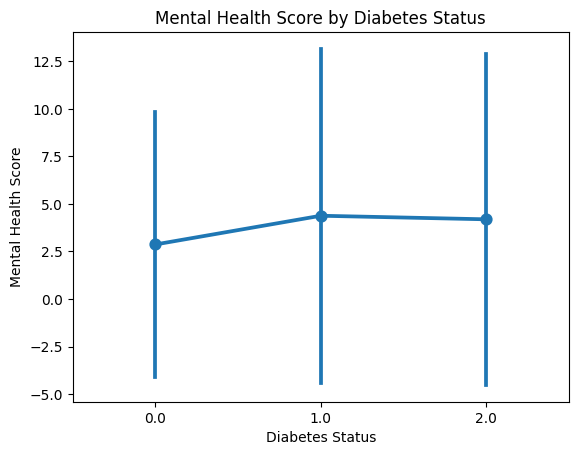

In [ ]:
# Example of Point Plot
sns.pointplot(x='Diabetes_binary', y='MentHlth', data=data, ci='sd')
plt.title('Mental Health Score by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Mental Health Score')
plt.show()

**Diabetes_binary vs MentHlth**

    The point plot shows that individuals with pre-diabetes (Diabetes_binary = 1) report more days of poor mental health (higher MentHlth scores) compared to those without diabetes (Diabetes_binary = 0) and those with diabetes (Diabetes_binary = 1). This indicates that diabetes is associated with poorer mental health.


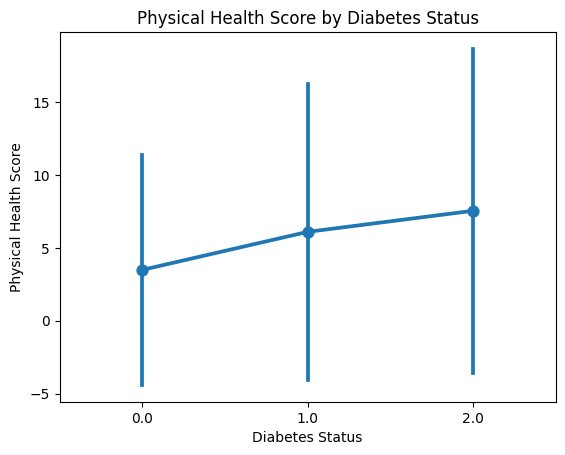

In [ ]:
# Example of Point Plot
sns.pointplot(x='Diabetes_binary', y='PhysHlth', data=data, ci='sd')
plt.title('Physical Health Score by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Physical Health Score')
plt.show()


**Diabetes_binary vs PhysHlth**

    The box plot reveals that individuals with diabetes (Diabetes_binary = 2) report more days of poor physical health (higher PhysHlth scores) compared to those without diabetes (Diabetes_binary = 0) and those without diabetes (Diabetes_binary = 0). This suggests that diabetes is associated with poorer physical health.


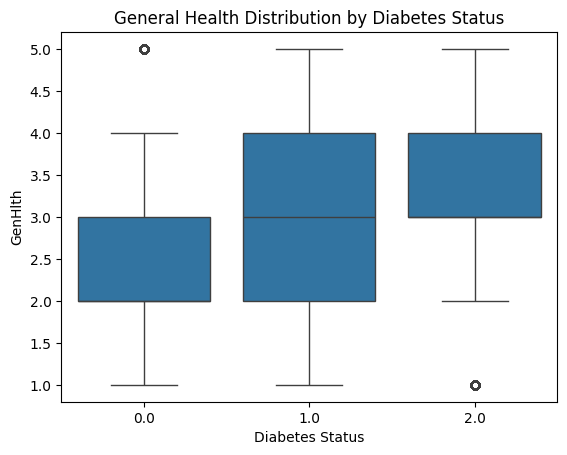

In [ ]:
# Example of Point Plot
sns.boxplot(x='Diabetes_binary', y='GenHlth', data=data)
plt.title('General Health Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('GenHlth')
plt.show()

**Diabetes_binary vs GenHlth**

    The box plot shows that individuals with diabetes (Diabetes_binary = 2) tend to report poorer general health (higher GenHlth scores) compared to those without diabetes (Diabetes_binary = 0) and pre-diabetics (Diabetes - 1). This implies that diabetes is associated with poorer general health.

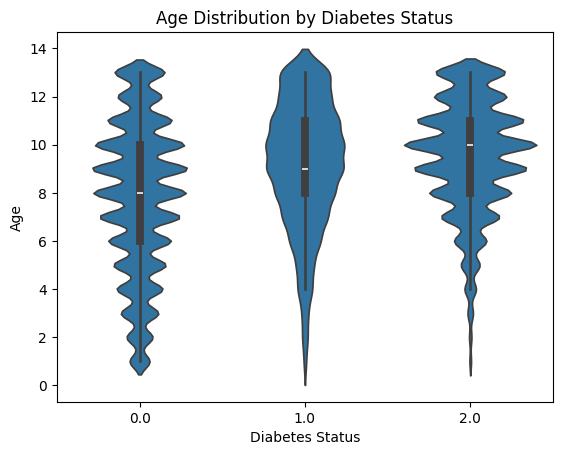

In [ ]:
# Example of Violin Plot
sns.violinplot(x='Diabetes_binary', y='Age', data=data)
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Age')
plt.show()

**Diabetes_binary vs Age**

    The box plot indicates that individuals with diabetes (Diabetes_binary = 2) are generally older than those without diabetes (Diabetes_binary = 0), most existing in age bracket 10 (ages 65 to 69). This suggests that the likelihood of having diabetes increases with age.

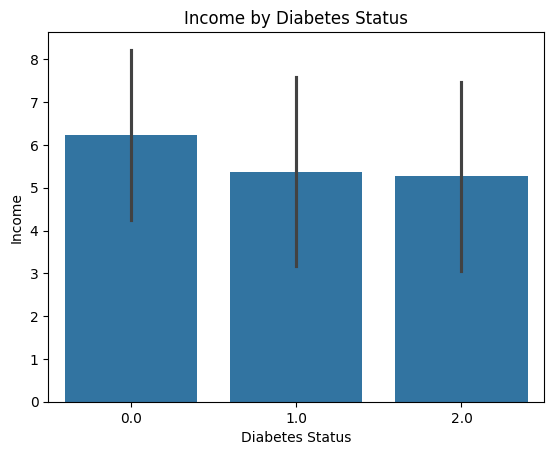

In [ ]:
# Example of Bar Plot with error bars
sns.barplot(x='Diabetes_binary', y='Income', data=data, ci='sd')
plt.title('Income by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Income')
plt.show()

**Diabetes_binary vs Income**

    The box plot indicates that individuals with diabetes (Diabetes_binary = 2) tend to have lower income levels compared to those without diabetes (Diabetes_binary = 0) and pre-diabetics (Diabetes - 1). This suggests that lower income is associated with a higher likelihood of having diabetes.

--------------------------------------------------------------------------------------------------------------------------------------------------------

## **Multivariate analysis**

### **Correlation Heat map**

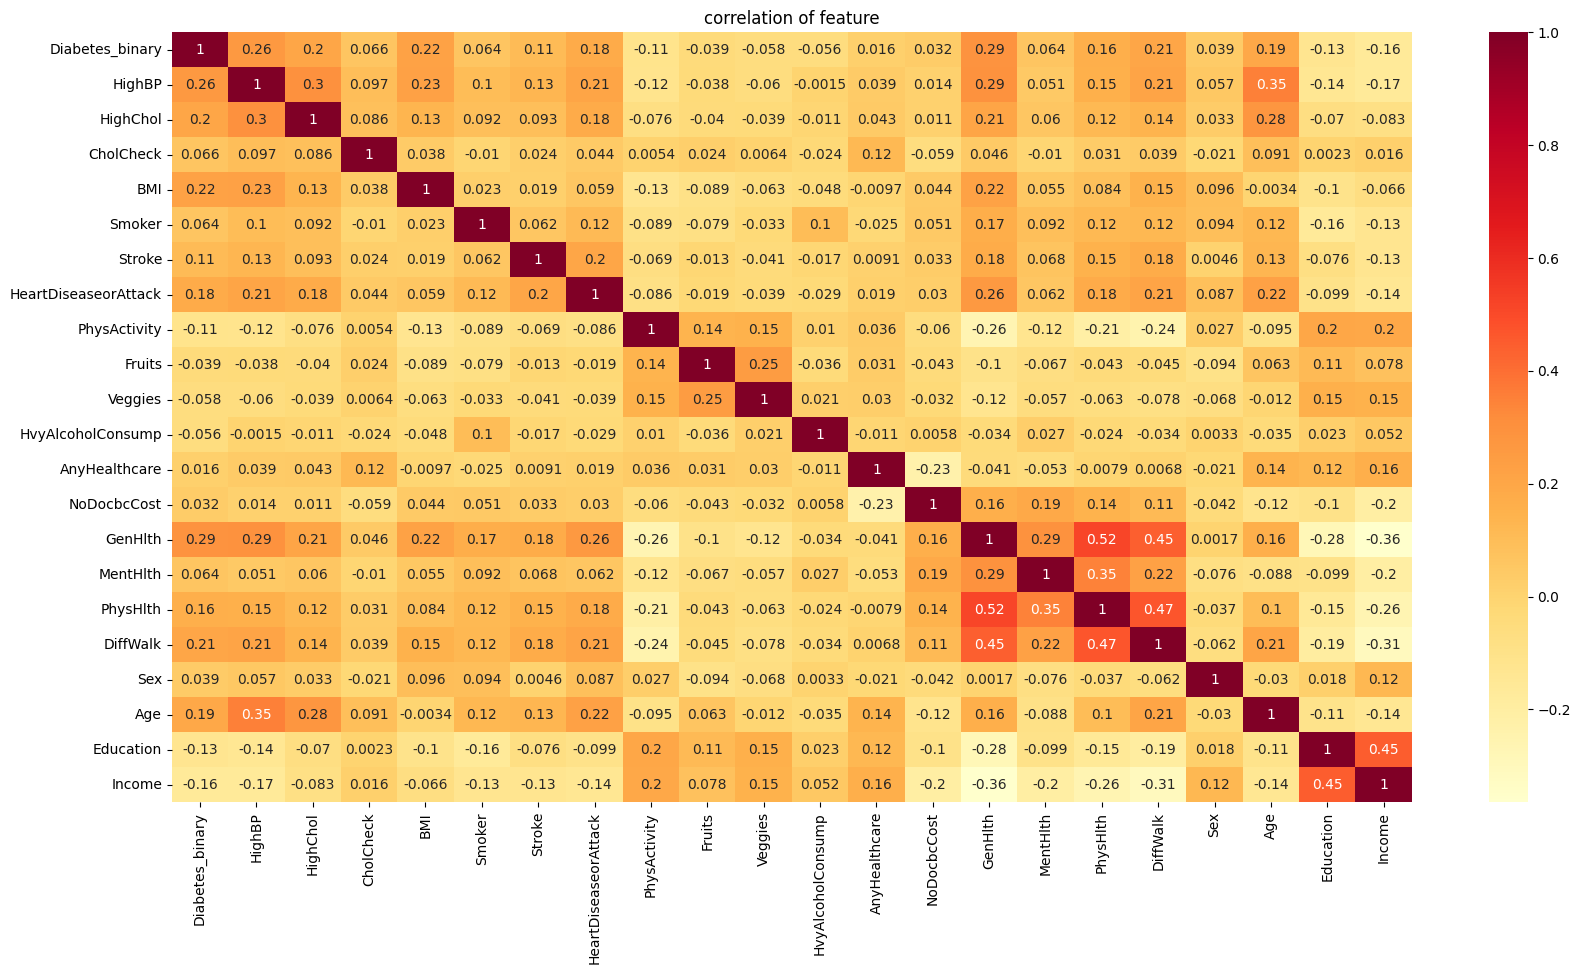

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")
plt.show()

 -
- BMI has a high positive correlation with the diabetes_binary,High BP, HighCol & Genhealth with a percentage of 21%,23%,13% & 24%  suggesting that individuals with higher BMI are more likely to have diabetes. On the other hand a negative correlation with education & income levels reprsenting a 1 % & 6.1% . This further indicates the two parameters can not explain likelihood of an individual having diabetes.

- Physical Activity shows a negative correlation with BMI and Diabetes_binary with a  13% & 9.7% respectively, suggesting that higher physical activity is associated with lower BMI and a lower likelihood of diabetes.

- Diabetes_binary:
 shows a positive correlation with HighBP, HighChol, and BMI, indicating that higher blood pressure, cholesterol levels, and BMI are associated with diabetes.

- HighBP:
There is  a high positive correlation with Diabetes_binary and HighChol, suggesting that individuals with high blood pressure are also likely to have diabetes and high cholesterol.

- Age:
 older age categories have a positive correlation with HighBP, HighChol, Stroke, and HeartDiseaseorAttack.

- Income.
Higher income categories  shows negative correlations with NoDocbcCost (not seeing a doctor due to cost), indicating that higher income individuals are less likely to avoid medical visits due to cost.

- Education.
Higher education levels  correlate negatively with NoDocbcCost and positively with PhysActivity, indicating that higher education is associated with better health behaviors and access to healthcare.
- Smoker:
Smoking status  correlates  positively with HvyAlcoholConsump and negatively with PhysActivity.

- HvyAlcoholConsump:
Heavy alcohol consumption correlates with other negative health indicators.




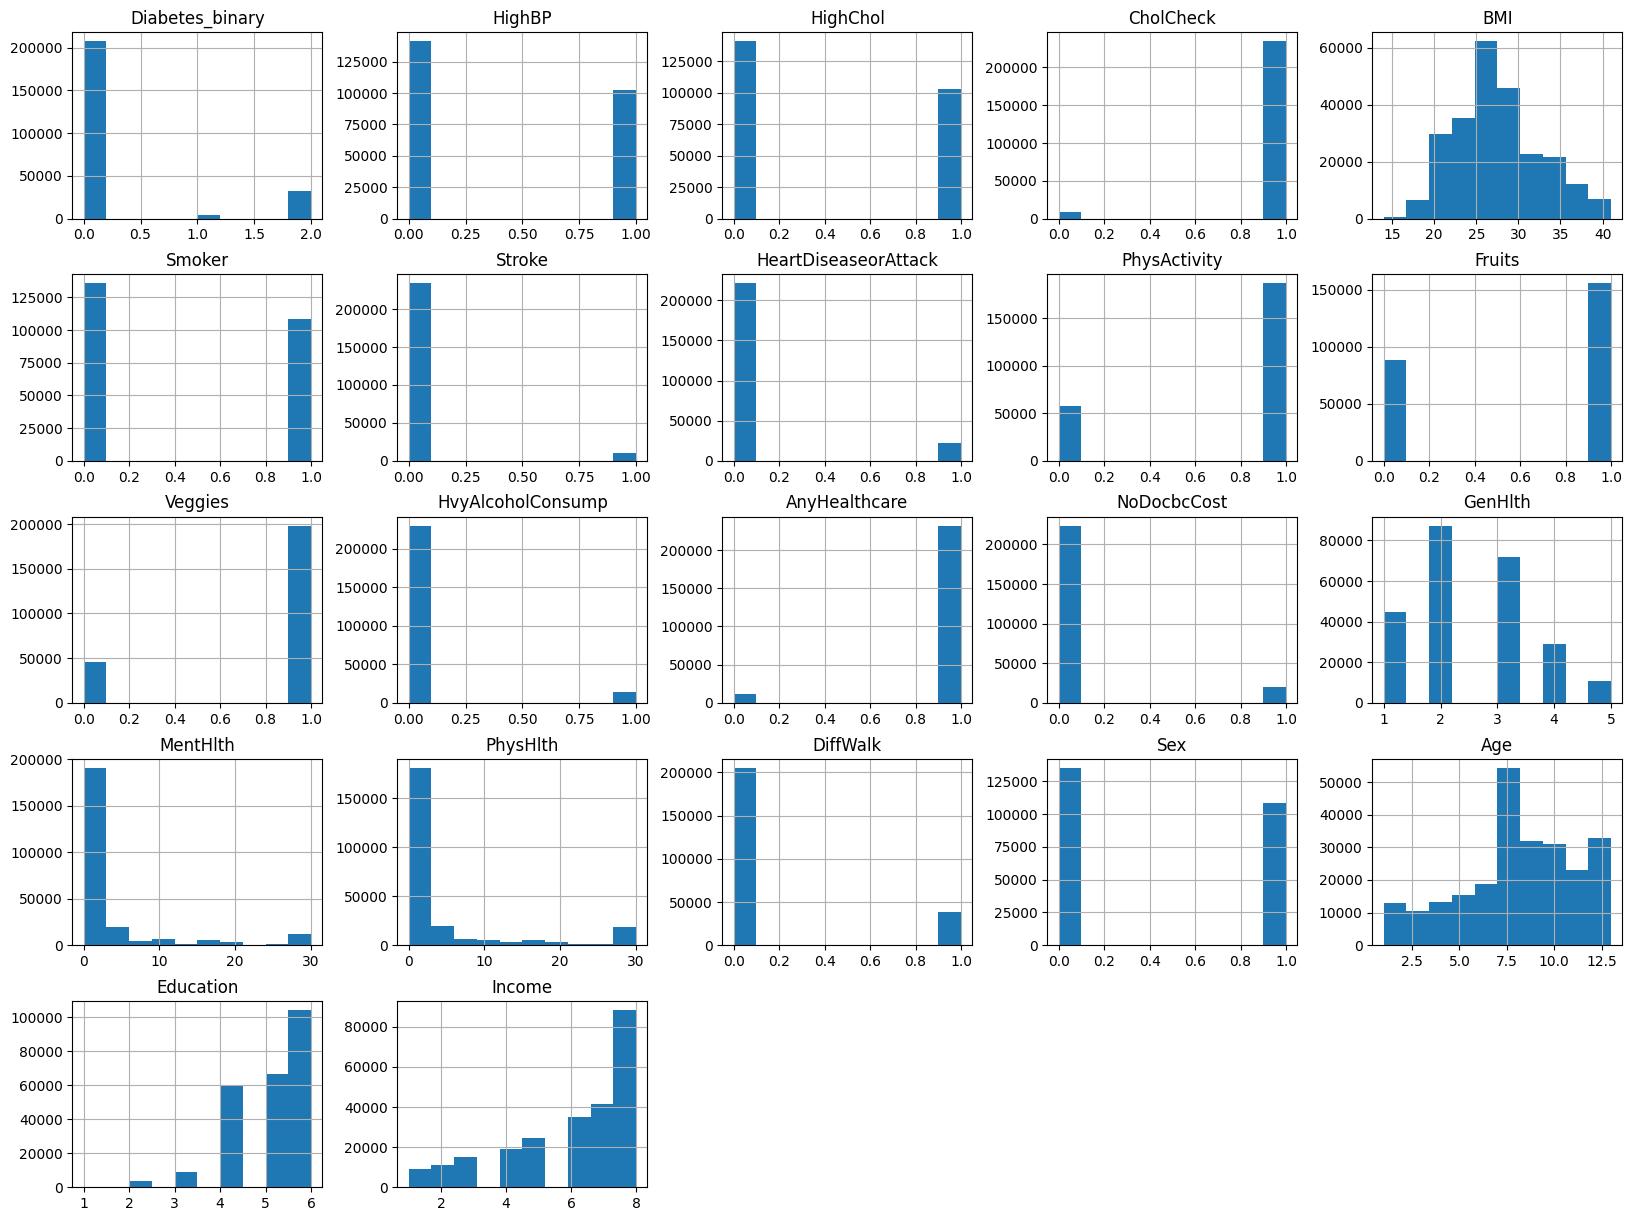

In [ ]:
data.hist(figsize=(20,15));

**BMI histogram**
 Shows a right-skewed distribution with a concentration of higher BMI values, this suggests that a significant portion of the population might be at risk of diabetes due to obesity.

 **Age Histogram:**
 shows a higher frequency of older individuals, this indicates an increased prevalence of diabetes in older age groups.

**Physical Activity Histogram**
shows a lower frequency of physical activity, this could suggest that a sedentary lifestyle is common among the population, which is a risk factor for diabetes.

**Smoking Status Histogram:**
shows a higher frequency of smokers,  indicating a higher risk of diabetes within the population.

**Blood Pressure Histogram:**
 shows a high frequency of elevated blood pressure readings, suggesting that hypertension might be prevalent, which is a risk factor for diabetes.


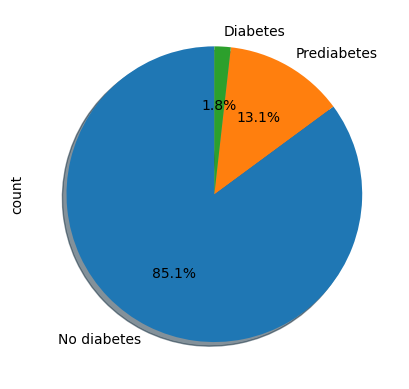

In [ ]:
labels = ['No diabetes', 'Prediabetes', 'Diabetes']  # Match the number of categories

data.Diabetes_binary.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90);

- The majority of the individuals do not have diabetes, which
is positive represent 88.3% of the population.
- A significant portion (10.2%) is at risk, as they are prediabetic and could develop diabetes without intervention.
- A smaller but notable portion (1.5%) has diabetes, indicating the need for targeted healthcare resources and interventions for this group.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243833 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       243833 non-null  float64
 1   HighBP                243833 non-null  float64
 2   HighChol              243833 non-null  float64
 3   CholCheck             243833 non-null  float64
 4   BMI                   243833 non-null  float64
 5   Smoker                243833 non-null  float64
 6   Stroke                243833 non-null  float64
 7   HeartDiseaseorAttack  243833 non-null  float64
 8   PhysActivity          243833 non-null  float64
 9   Fruits                243833 non-null  float64
 10  Veggies               243833 non-null  float64
 11  HvyAlcoholConsump     243833 non-null  float64
 12  AnyHealthcare         243833 non-null  float64
 13  NoDocbcCost           243833 non-null  float64
 14  GenHlth               243833 non-null  float64
 15  MentH

# **Data Preprocessing**

## Dealing with Data Imbalance

In [ ]:
# Separate the target variable from the features
df_features1 = data.drop("Diabetes_binary",axis=1)
df_target1 = data["Diabetes_binary"]

In [ ]:
df_target1.value_counts()

Diabetes_binary
0.0    207514
2.0     31979
1.0      4340
Name: count, dtype: int64

**No Diabetes (0.0) | 200824:** The vast majority of the individuals in the dataset do not have diabetes. This suggests that a significant portion of the dataset consists of healthy individuals without any diabetes diagnosis.

**Diabetes (2.0) | 28112:** A smaller, yet significant, portion of the dataset consists of individuals diagnosed with diabetes. This group is essential for understanding the factors and characteristics associated with diabetes.

**Prediabetes (1.0) | 4024:** The smallest portion of the dataset consists of individuals in the prediabetes stage. This group is critical for preventive measures and understanding the progression from prediabetes to diabetes.


In [ ]:
df_features1.shape , df_target1.shape

((243833, 21), (243833,))

In [ ]:
# Import SMOTE from the imbalanced-learn library
from imblearn.over_sampling import SMOTE

# Create an instance of the SMOTE class with a random state for reproducibility
smote = SMOTE(random_state=42)

# Apply SMOTE to the feature set (df_features1) and target set (df_target1)
df_features, df_target = smote.fit_resample(df_features1, df_target1)

# Display the shapes of the resulting datasets to verify the resampling
print(f"Feature set shape: {df_features.shape}")
print(f"Target set shape: {df_target.shape}")

Feature set shape: (622542, 21)
Target set shape: (622542,)


In [ ]:
df_target.value_counts()

Diabetes_binary
0.0    207514
2.0    207514
1.0    207514
Name: count, dtype: int64

## Feature Selection

Feature selection is a crucial step in the machine learning pipeline, as it can improve the performance of your model by removing irrelevant or redundant features.

1.**Recursive Feature Elimination (RFE)**

Recursively eliminate less important features.


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming 'df_features' and 'df_target' are the resampled DataFrames from NearMiss
X = df_features  # Use the resampled features
y = df_target    # Use the resampled target

# Initialize the model and RFE with parallel processing
model = LogisticRegression(max_iter=10000, solver='liblinear')
rfe = RFE(model, n_features_to_select=10, step=1, verbose=1)

# Fit the model
rfe.fit(X, y)

# Get the selected features
selected_feature_indices = rfe.support_
selected_features = X.columns[selected_feature_indices]
print("Selected Features:", selected_features)

Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Selected Features: Index(['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'Sex'],
      dtype='object')


2. **Lasso (L1 Regularization)**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Initialize the Lasso model
lasso = Lasso(alpha=0.01)

# Fit the model
lasso.fit(X, y)

# Select features
model = SelectFromModel(lasso, prefit=True)
X_selected = model.transform(X)

# Get the selected feature names
selected_features = X.columns[model.get_support()]
print("Selected Features using Lasso:", selected_features)

Selected Features using Lasso: Index(['HighBP', 'HighChol', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Sex',
       'Age', 'Income'],
      dtype='object')


3.  **Feature Importance from Tree-based Methods**

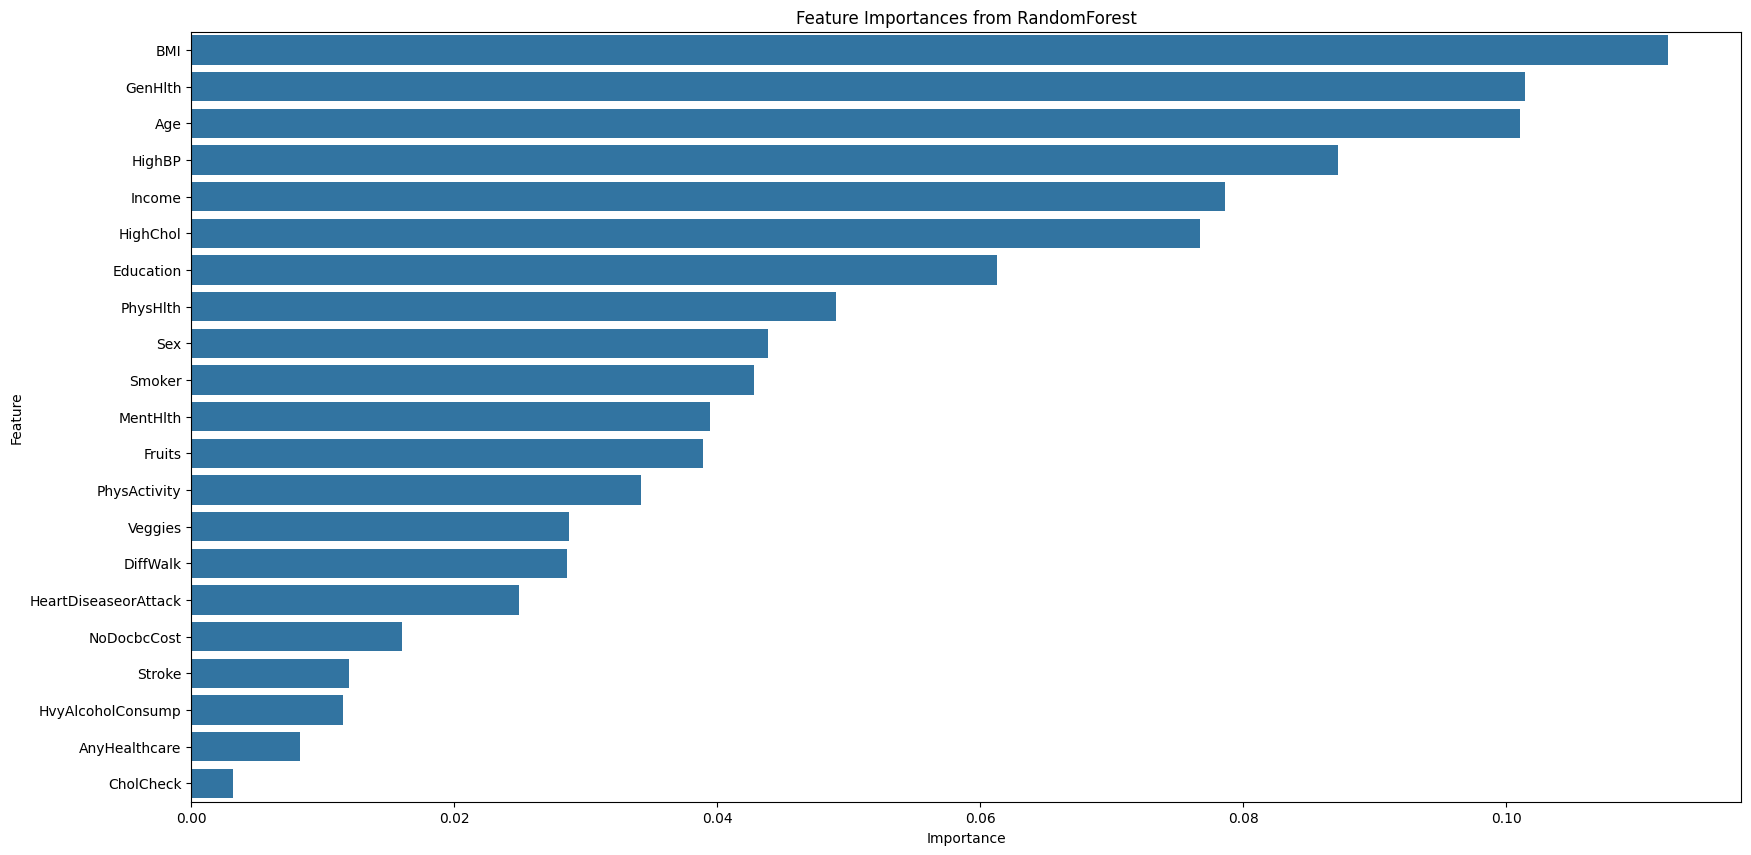

Top Features: 3                      BMI
13                 GenHlth
18                     Age
0                   HighBP
20                  Income
1                 HighChol
19               Education
15                PhysHlth
17                     Sex
4                   Smoker
14                MentHlth
8                   Fruits
7             PhysActivity
9                  Veggies
16                DiffWalk
6     HeartDiseaseorAttack
12             NoDocbcCost
5                   Stroke
10       HvyAlcoholConsump
Name: Feature, dtype: object


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForest model
model = RandomForestClassifier(n_estimators=100)

# Fit the model
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(20, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importances from RandomForest")
plt.show()

# Get the top features based on importance
top_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature']
print("Top Features:", top_features)

- BMI (Body Mass Index):

BMI is a key indicator of obesity, which is a significant risk factor for developing diabetes. Higher BMI values typically correlate with higher risk.

- Age:

The risk of developing diabetes increases with age. Older age groups are generally at higher risk.

- Income:

Income levels can influence access to healthcare, diet quality, and lifestyle choices, all of which affect diabetes risk. Lower income may be associated with higher risk due to limited access to healthy food and healthcare.

- PhysHlth (Physical Health):

Physical health status can directly impact the likelihood of developing diabetes. Poor physical health may be associated with a higher risk of diabetes.
- GenHlth (General Health):

General health status is a broad measure that includes physical, mental, and social well-being. Poor general health may indicate higher susceptibility to diabetes.
- MentHlth (Mental Health):

Mental health conditions such as stress and depression can affect lifestyle choices and metabolic processes, potentially increasing diabetes risk.
- Education:

Education level can influence health literacy, lifestyle choices, and access to healthcare resources. Higher education levels are generally associated with lower diabetes risk.
- Sex:

There are differences in diabetes prevalence between males and females, influenced by both biological and lifestyle factors.
HighChol (High Cholesterol):

High cholesterol levels are often associated with metabolic syndrome and diabetes. Managing cholesterol is important for diabetes prevention.
- HighBP (High Blood Pressure):

High blood pressure is a common comorbidity with diabetes. It can indicate underlying cardiovascular issues linked to diabetes risk.
- Smoker:

Smoking is a risk factor for many chronic diseases, including diabetes. It can affect insulin sensitivity and overall metabolic health.
- Fruits:

Regular consumption of fruits is typically associated with a healthier diet and lower risk of diabetes. However, the type and amount of fruit consumption can vary.
- PhysActivity (Physical Activity):

Regular physical activity helps maintain healthy body weight and improves insulin sensitivity, reducing diabetes risk.
- Veggies:

Consumption of vegetables is linked to a healthy diet and lower risk of chronic diseases, including diabetes.
- DiffWalk (Difficulty Walking):

Difficulty walking may indicate mobility issues and a sedentary lifestyle, which can increase the risk of diabetes.
- HeartDiseaseorAttack:

A history of heart disease or heart attack is often associated with metabolic syndrome and diabetes. Cardiovascular issues can be both a cause and effect of diabetes.

- The top features identified are strongly aligned with known risk factors for diabetes. These include indicators of physical and mental health, lifestyle factors (such as diet and physical activity), sociodemographic variables (such as age, income, education), and comorbid conditions (like high blood pressure and high cholesterol). Understanding these features' roles can help in developing targeted interventions and improving diabetes prediction models.

# **Best of all- Selecting the most important features**

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
# Step 1: Recursive Feature Elimination (RFE)
# Initialize the model and RFE with parallel processing
model = LogisticRegression(max_iter=10000, solver='liblinear')
rfe = RFE(model, n_features_to_select=10, step=1, verbose=1)
rfe.fit(X, y)
rfe_features = X.columns[rfe.support_]
print("Top 10 Features using RFE:", rfe_features.tolist())

# Step 2: Tree-based Methods (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X, y)
importances = rf_model.feature_importances_
rf_features = pd.Series(importances, index=X.columns)
top_rf_features = rf_features.nlargest(10).index
print("Top 10 Features using RandomForest:", top_rf_features.tolist())

# Step 3: Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
lasso_features = pd.Series(lasso.coef_, index=X.columns)
top_lasso_features = lasso_features[abs(lasso_features) > 0].nlargest(10).index
print("Top 10 Features using Lasso:", top_lasso_features.tolist())

# Combine high score features
high_score_features = list(set(rfe_features) | set(top_rf_features) | set(top_lasso_features))
print("Combined Top Features:", high_score_features)

Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Top 10 Features using RFE: ['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'Sex']
Top 10 Features using RandomForest: ['BMI', 'GenHlth', 'Age', 'HighBP', 'Income', 'HighChol', 'Education', 'PhysHlth', 'Sex', 'Smoker']
Top 10 Features using Lasso: ['HighBP', 'GenHlth', 'HighChol', 'Age', 'Sex', 'BMI', 'MentHlth', 'PhysHlth', 'Income']
Combined Top Features: ['NoDocbcCost', 'PhysHlth', 'Stroke', 'HighBP', 'CholCheck', 'HeartDiseaseorAttack', 'Age', 'Smoker', 'AnyHealthcare', 'HvyAlcoholConsump', 'BMI', 'MentHlth', 

In [ ]:
# Create a new DataFrame with the high score features
df_high_score = X[high_score_features]
df_high_score

,NoDocbcCost,PhysHlth,Stroke,HighBP,CholCheck,HeartDiseaseorAttack,Age,Smoker,AnyHealthcare,HvyAlcoholConsump,BMI,MentHlth,Income,GenHlth,HighChol,Sex,Education
0,0.0,15.00000,0.0,1.000000,1.0,0.0000,9.000000,1.000000,1.000000,0.0,40.000000,18.0,3.0,5.000000,1.000000,0.000000,4.0000
1,1.0,0.00000,0.0,0.000000,0.0,0.0000,7.000000,1.000000,0.000000,0.0,25.000000,0.0,1.0,3.000000,0.000000,0.000000,6.0000
2,1.0,30.00000,0.0,1.000000,1.0,0.0000,9.000000,0.000000,1.000000,0.0,28.000000,30.0,8.0,5.000000,1.000000,0.000000,4.0000
3,0.0,0.00000,0.0,1.000000,1.0,0.0000,11.000000,0.000000,1.000000,0.0,27.000000,0.0,6.0,2.000000,0.000000,0.000000,3.0000
4,0.0,0.00000,0.0,1.000000,1.0,0.0000,11.000000,0.000000,1.000000,0.0,24.000000,3.0,4.0,2.000000,1.000000,0.000000,5.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622537,0.0,0.00000,0.0,0.000000,1.0,0.0000,6.000000,0.205294,1.000000,0.0,28.000000,0.0,8.0,2.794706,0.000000,0.794706,5.0000
622538,0.0,0.00000,0.0,1.000000,1.0,0.0000,6.020523,1.000000,0.020523,0.0,29.979477,0.0,7.0,3.020523,1.000000,1.000000,4.0000
622539,0.0,2.75197,0.0,0.248030,1.0,0.0000,9.751970,1.000000,1.000000,0.0,33.751970,0.0,6.0,3.000000,1.000000,0.248030,4.0000
622540,0.0,30.00000,0.0,1.000000,1.0,0.9671,9.967100,1.000000,1.000000,0.0,27.967100,10.0,2.0,5.000000,1.000000,0.967100,4.9671


In [ ]:
df_high_score.shape

(622542, 17)

## **Data Splitting and Scaling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(df_high_score, df_target, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the resulting datasets
print(f"Training feature set shape: {X_train.shape}")
print(f"Testing feature set shape: {X_test.shape}")
print(f"Training target set shape: {y_train.shape}")
print(f"Testing target set shape: {y_test.shape}")

Training feature set shape: (498033, 17)
Testing feature set shape: (124509, 17)
Training target set shape: (498033,)
Testing target set shape: (124509,)


# **Model Fitting and Evaluation**

## Model performance Evaluation

1. **Precision:** This measures the proportion of true positive predictions out of all positive predictions made for a class.

2. **Recall:** This measures the proportion of true positives that were correctly identified out of all actual instances of a class

3. **F1-score:** This is the harmonic mean of precision and recall, providing a single metric that balances both. It’s useful for evaluating models on imbalanced classes.

4. **Support:** This is the number of actual occurrences of each class in the dataset.

5. **Accuracy:** This is the proportion of all correctly classified instances out of the total instances.

6. **Macro Average:** The average performance across all classes, treating each class equally regardless of its support.

7. **Weighted Average:** The average performance across all classes, weighted by the number of true instances for each class.


## Baseline Model- Logistic regression- Not tuned

Training Logistic Regression...


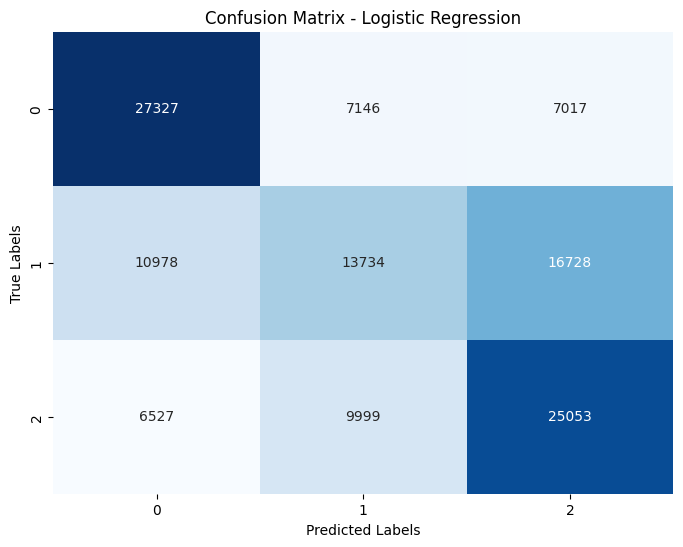

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.66      0.63     41490
         1.0       0.44      0.33      0.38     41440
         2.0       0.51      0.60      0.55     41579

    accuracy                           0.53    124509
   macro avg       0.52      0.53      0.52    124509
weighted avg       0.52      0.53      0.52    124509



In [ ]:
# Logistic Regression
print("Training Logistic Regression...")

# Initialize the model
log_reg = LogisticRegression()

# Fit the model
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the model
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

print(f"Logistic Regression - Classification Report:\n{class_report_log_reg}")

## Baseline Model- Logistic regression- Tuned

Best parameters: {'C': 10, 'solver': 'saga'}


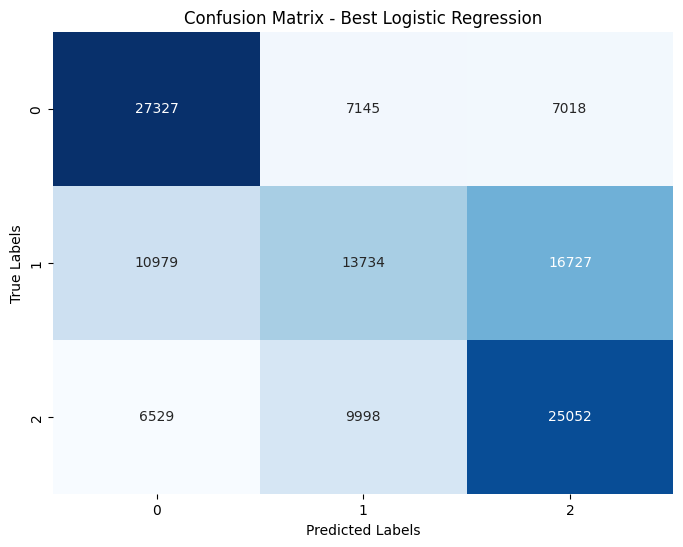

Best Logistic Regression - Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.66      0.63     41490
         1.0       0.44      0.33      0.38     41440
         2.0       0.51      0.60      0.55     41579

    accuracy                           0.53    124509
   macro avg       0.52      0.53      0.52    124509
weighted avg       0.52      0.53      0.52    124509



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Predict on the test set with the best estimator
y_pred_best_log_reg = grid_search.best_estimator_.predict(X_test_scaled)

# Evaluate the model
conf_matrix_best_log_reg = confusion_matrix(y_test, y_pred_best_log_reg)
class_report_best_log_reg = classification_report(y_test, y_pred_best_log_reg)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Best Logistic Regression')
plt.show()

print(f"Best Logistic Regression - Classification Report:\n{class_report_best_log_reg}")

## Decision Tree- Not Tuned

Training Decision Tree...


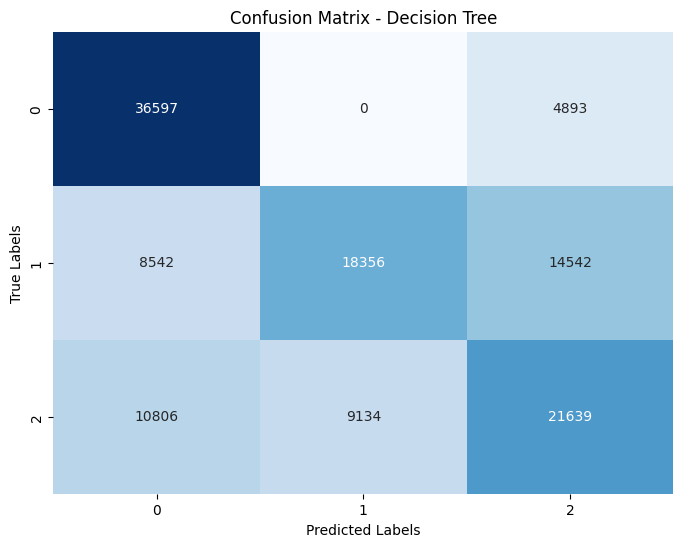

Decision Tree - Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.88      0.75     41490
         1.0       0.67      0.44      0.53     41440
         2.0       0.53      0.52      0.52     41579

    accuracy                           0.62    124509
   macro avg       0.62      0.62      0.60    124509
weighted avg       0.62      0.62      0.60    124509



In [ ]:
print("Training Decision Tree...")

# Initialize the model
decision_tree = DecisionTreeClassifier(max_depth=5)

# Fit the model
decision_tree.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_decision_tree = decision_tree.predict(X_test_scaled)

# Evaluate the model
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
class_report_decision_tree = classification_report(y_test, y_pred_decision_tree)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_decision_tree, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Print results
print(f"Decision Tree - Classification Report:\n{class_report_decision_tree}")


## Decision Tree- Tuned

Training Decision Tree...
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.6794891167232306


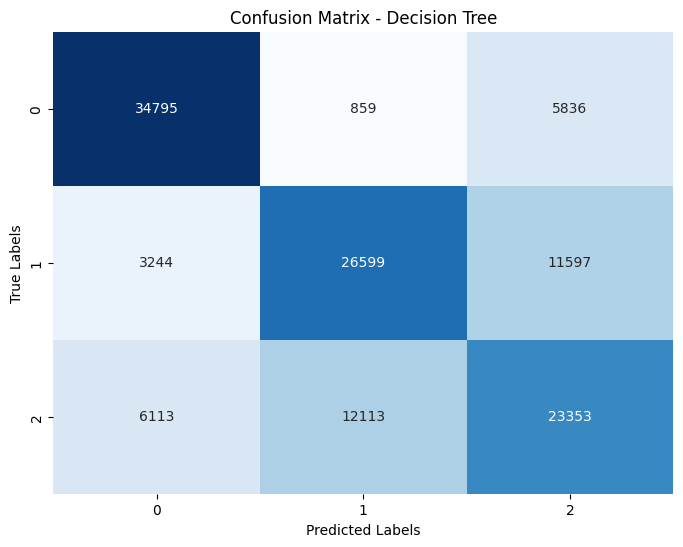

Decision Tree - Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81     41490
         1.0       0.67      0.64      0.66     41440
         2.0       0.57      0.56      0.57     41579

    accuracy                           0.68    124509
   macro avg       0.68      0.68      0.68    124509
weighted avg       0.68      0.68      0.68    124509



In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

print("Training Decision Tree...")

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the model
decision_tree = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# Predict on the test set with the best model
best_decision_tree = grid_search.best_estimator_
y_pred_decision_tree = best_decision_tree.predict(X_test_scaled)

# Evaluate the model
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
class_report_decision_tree = classification_report(y_test, y_pred_decision_tree)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_decision_tree, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Print results
print(f"Decision Tree - Classification Report:\n{class_report_decision_tree}")

## K-Nearest Neighbors- Not Tuned

Training K-Nearest Neighbors...


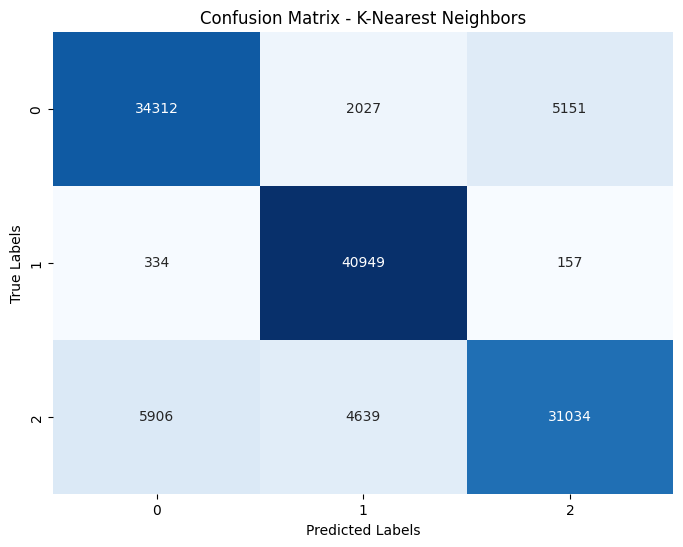

K-Nearest Neighbors - Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84     41490
         1.0       0.86      0.99      0.92     41440
         2.0       0.85      0.75      0.80     41579

    accuracy                           0.85    124509
   macro avg       0.85      0.85      0.85    124509
weighted avg       0.85      0.85      0.85    124509



In [ ]:
print("Training K-Nearest Neighbors...")

# Initialize the model
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()

# Print results
print(f"K-Nearest Neighbors - Classification Report:\n{class_report_knn}")

## K-Nearest Neighbors- Tuned

In [ ]:
print("Training K-Nearest Neighbors...")

# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter distribution
param_dist = {
    'n_neighbors': [5,6, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the model
knn = KNeighborsClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(knn, param_dist, n_iter=10, cv=2, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Get the best model
best_knn = random_search.best_estimator_

# Predict on the test set
y_pred_knn = best_knn.predict(X_test_scaled)

# Evaluate the model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()

# Print results
print(f"K-Nearest Neighbors - Classification Report:\n{class_report_knn}")

# Print best parameters
print(f"Best Parameters:\n{random_search.best_params_}")

Training K-Nearest Neighbors...


## Random Forest- Not Tuned

In [ ]:
print("Training Random Forest...")

# Initialize the model
random_forest = RandomForestClassifier(max_depth=5, n_estimators=1000, class_weight='balanced')

# Fit the model
random_forest.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_random_forest = random_forest.predict(X_test_scaled)

# Evaluate the model
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
class_report_random_forest = classification_report(y_test, y_pred_random_forest)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_random_forest, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest.')
plt.show()

# Print results
print(f"Random Forest - Classification Report:\n{class_report_random_forest}")


## Random Forest- Tuned

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import randint

print("Training Random Forest...")

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None, 5, 10],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False],
    'class_weight': ['balanced', None]
}

# Initialize the model
random_forest = RandomForestClassifier()

# Set up the Randomized Search
random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_dist,
                                   n_iter=50, cv=2, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters found: {best_params}")

# Initialize the model with the best parameters
best_random_forest = RandomForestClassifier(**best_params)

# Fit the model
best_random_forest.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_random_forest = best_random_forest.predict(X_test_scaled)

# Evaluate the model
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
class_report_random_forest = classification_report(y_test, y_pred_random_forest)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_random_forest, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Print results
print(f"Random Forest - Classification Report:\n{class_report_random_forest}")

## Cross-validation scores for each model

In [ ]:
# Define models to evaluate
models = [
    ['Logistic Regression', LogisticRegression(max_iter=10000)],
    ['Random Forest', RandomForestClassifier(max_depth=5, n_estimators=1000, class_weight='balanced')],
    ['Decision Tree', DecisionTreeClassifier(max_depth=5)],
    ['K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=6)]
]

for name, model in models:
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=2, scoring='accuracy')
    print(f"{name} - Cross-Validation Scores: {cv_scores}")
    print(f"{name} - Mean CV Score: {np.mean(cv_scores)}")

## Artificial Neural Network (ANN) deep learning model

### Build and Train the ANN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Using sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_data=(X_test_scaled, y_test))

## Evaluate the Model

In [ ]:
# Evaluate the model on the train data
loss, accuracy = model.evaluate(X_train_scaled, y_train)
print(f'Train Accuracy: {accuracy * 100:.2f}%')

In [ ]:
# Evaluate the model on the train data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

## Plot Training History

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()